In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    r2_score,
    mean_absolute_percentage_error,
    mean_squared_error
)

plt.rcParams['figure.figsize'] = (15, 8)
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

In [2]:
data = pd.read_csv('media prediction and its cost.csv')

In [3]:
data.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [4]:
df_cat=data.select_dtypes(exclude=np.number)
df_num=data.select_dtypes(include=np.number)
df_num.shape[1]
df_cat.columns

Index(['food_category', 'food_department', 'food_family', 'promotion_name',
       'sales_country', 'marital_status', 'gender', 'education', 'member_card',
       'occupation', 'houseowner', 'avg. yearly_income', 'brand_name',
       'store_type', 'store_city', 'store_state', 'media_type'],
      dtype='object')

In [5]:
data.shape

(60428, 40)

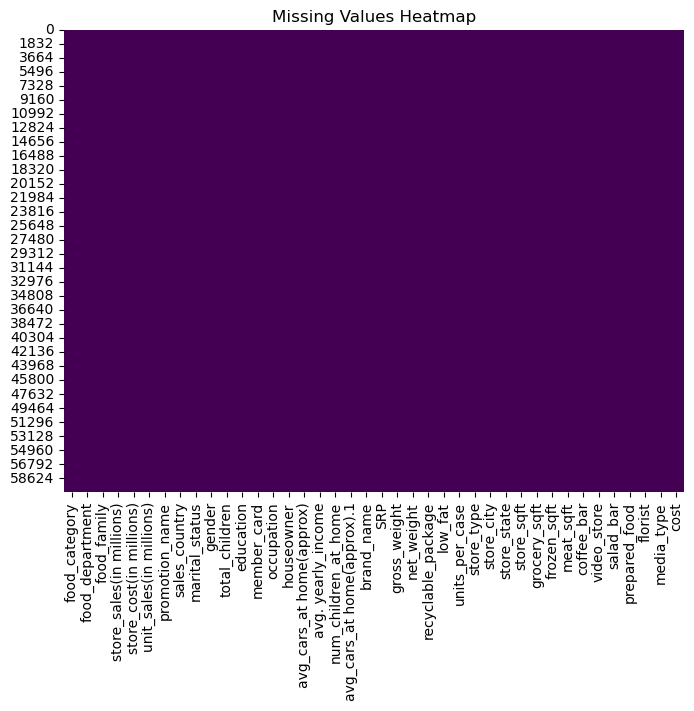

In [6]:
missing_values = data.isnull()
plt.figure(figsize=(8, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [7]:
usdata = data.query("sales_country == 'USA'")

In [8]:
usdata.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [9]:
num_cols=data.select_dtypes(include=np.number).columns.to_list()

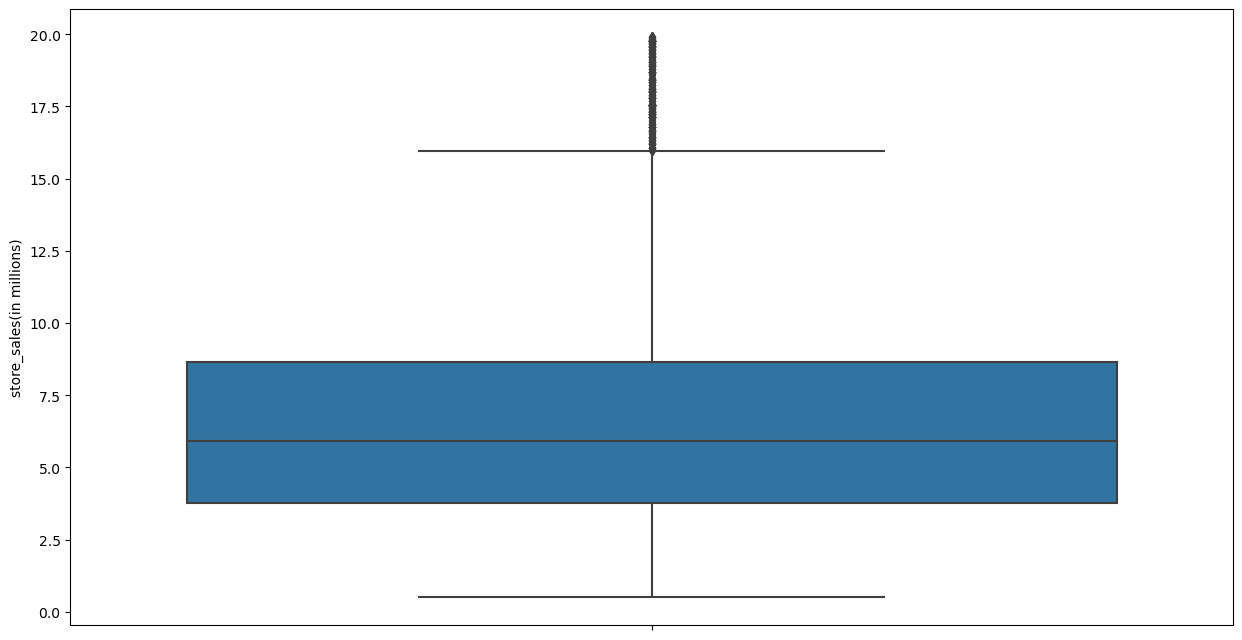

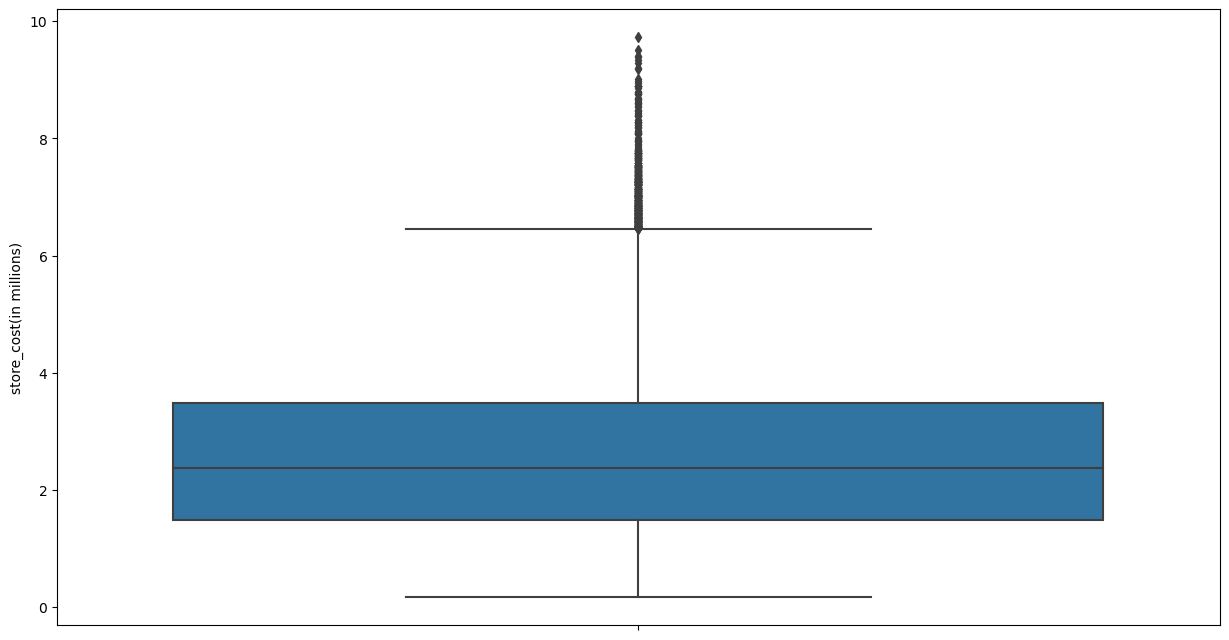

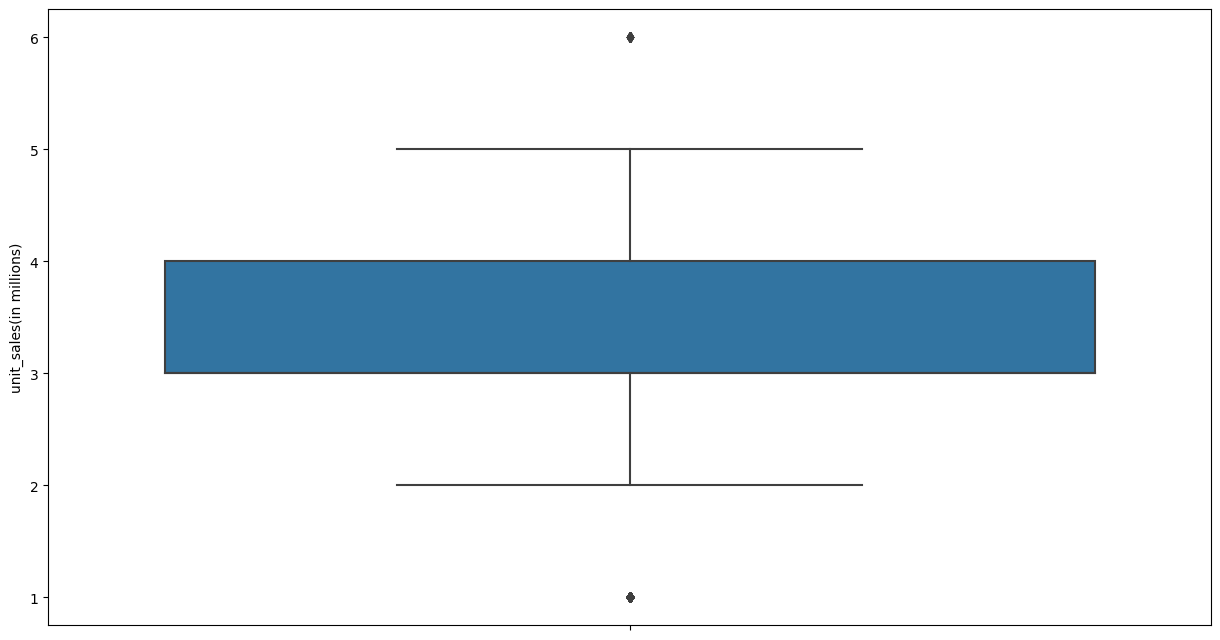

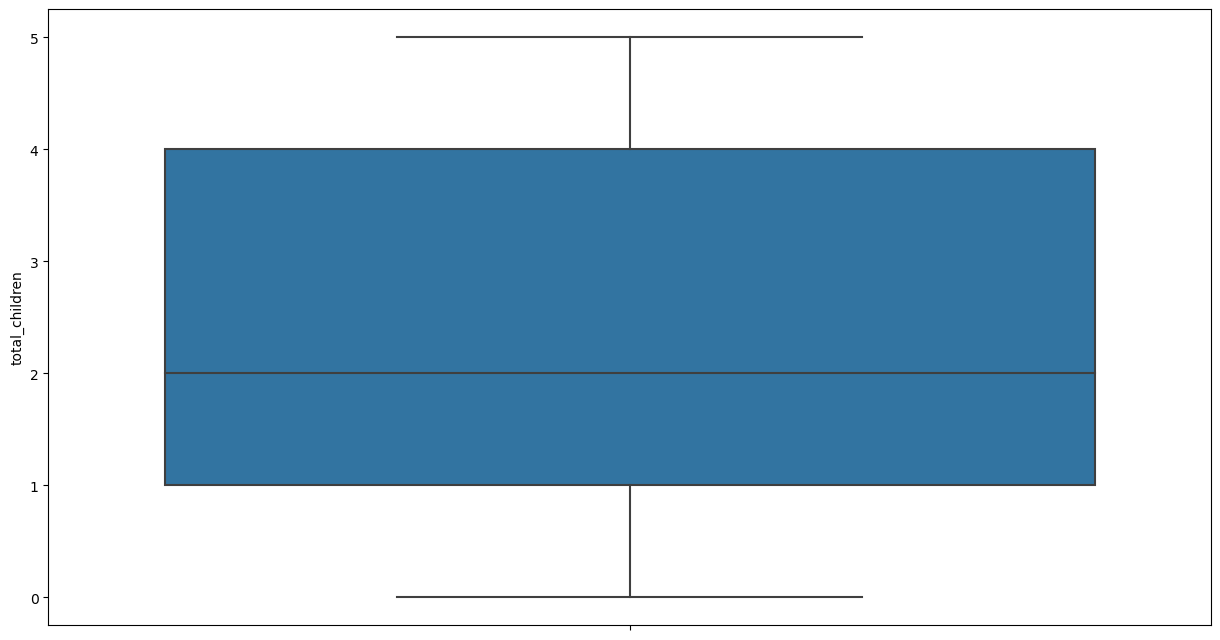

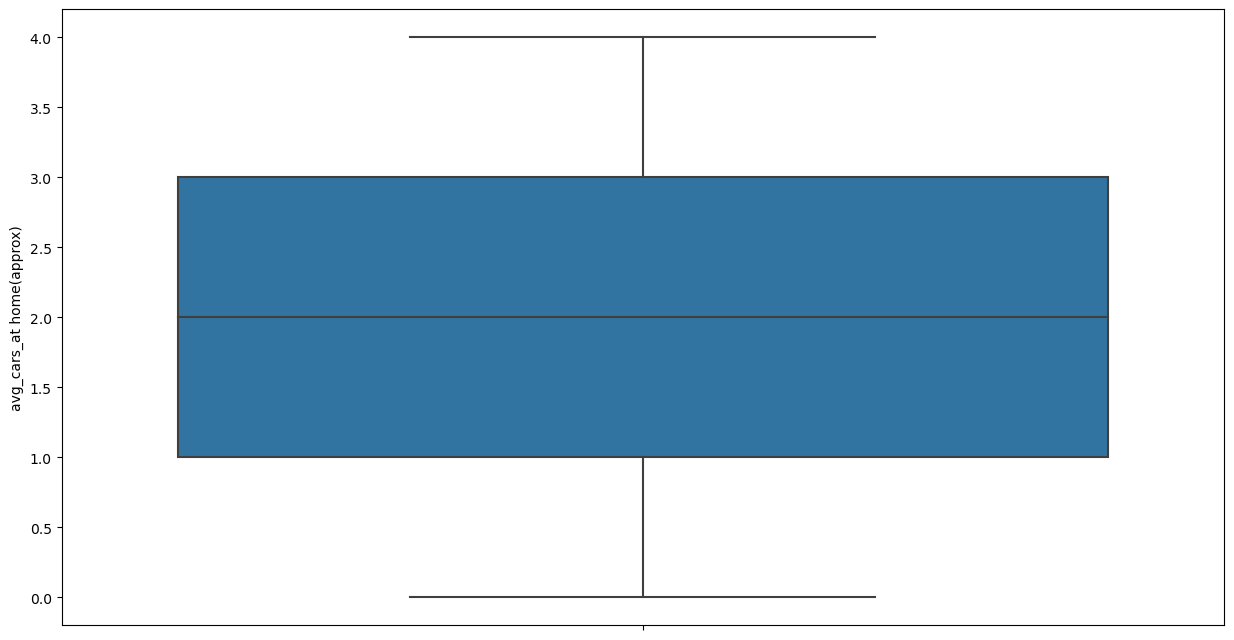

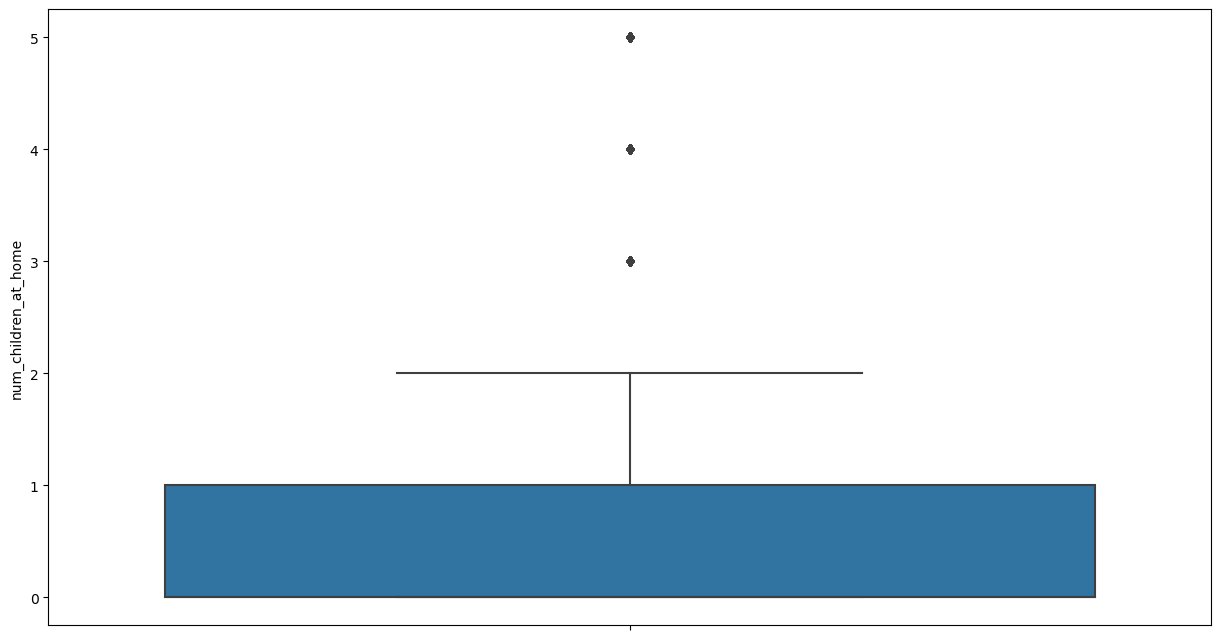

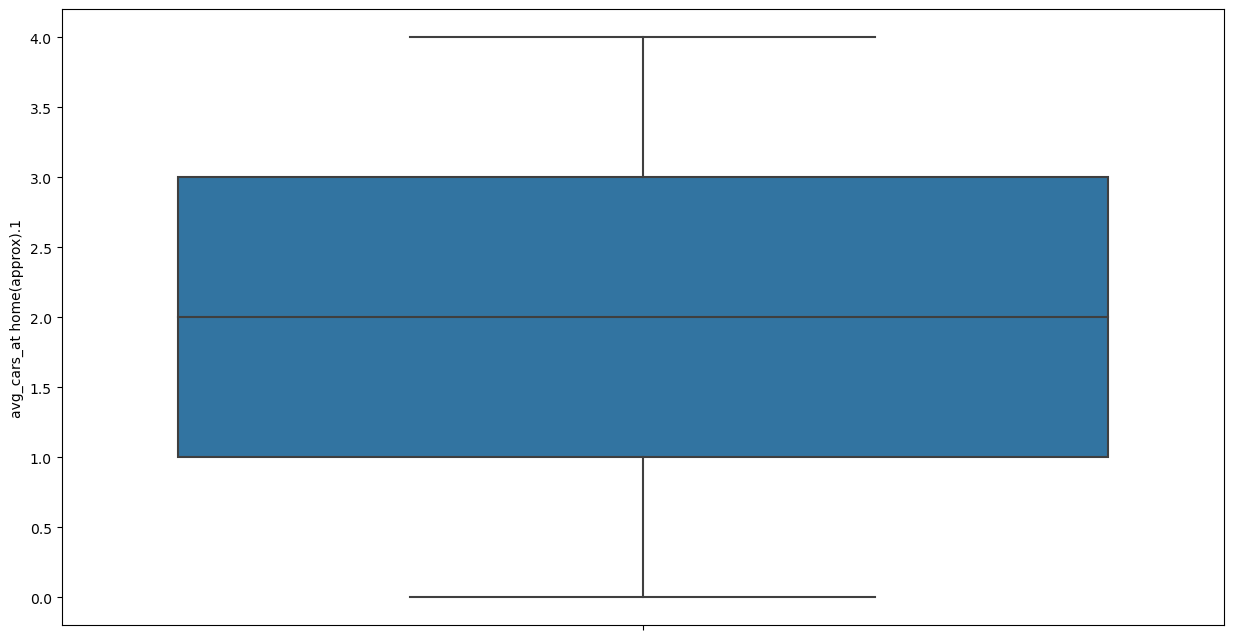

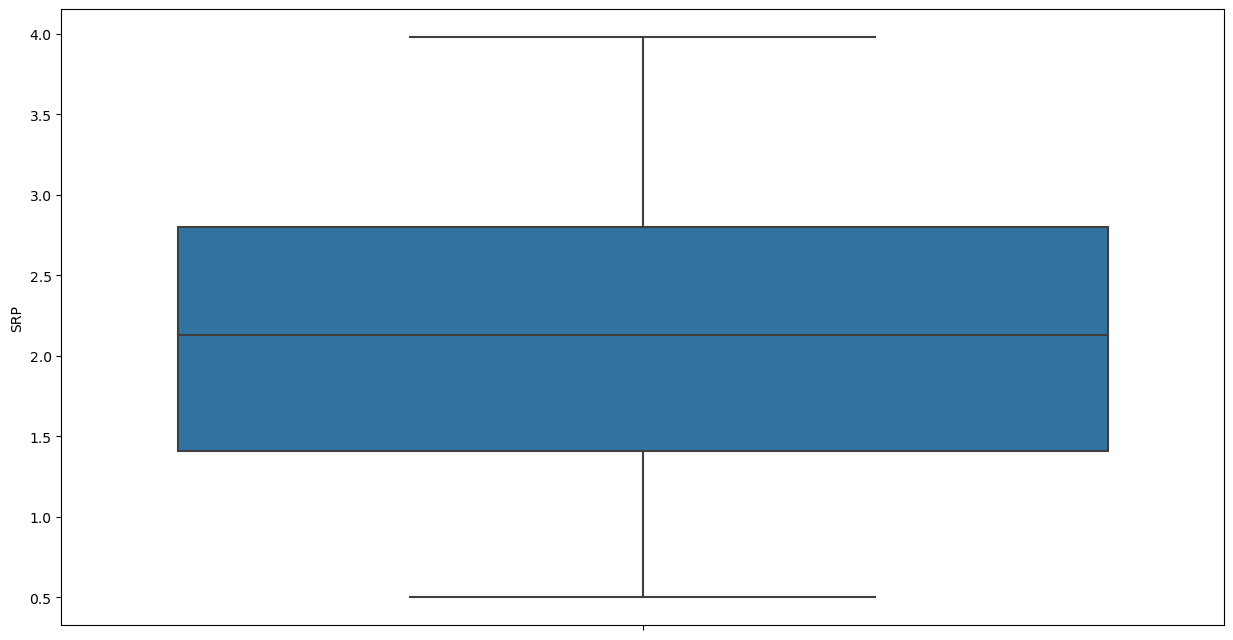

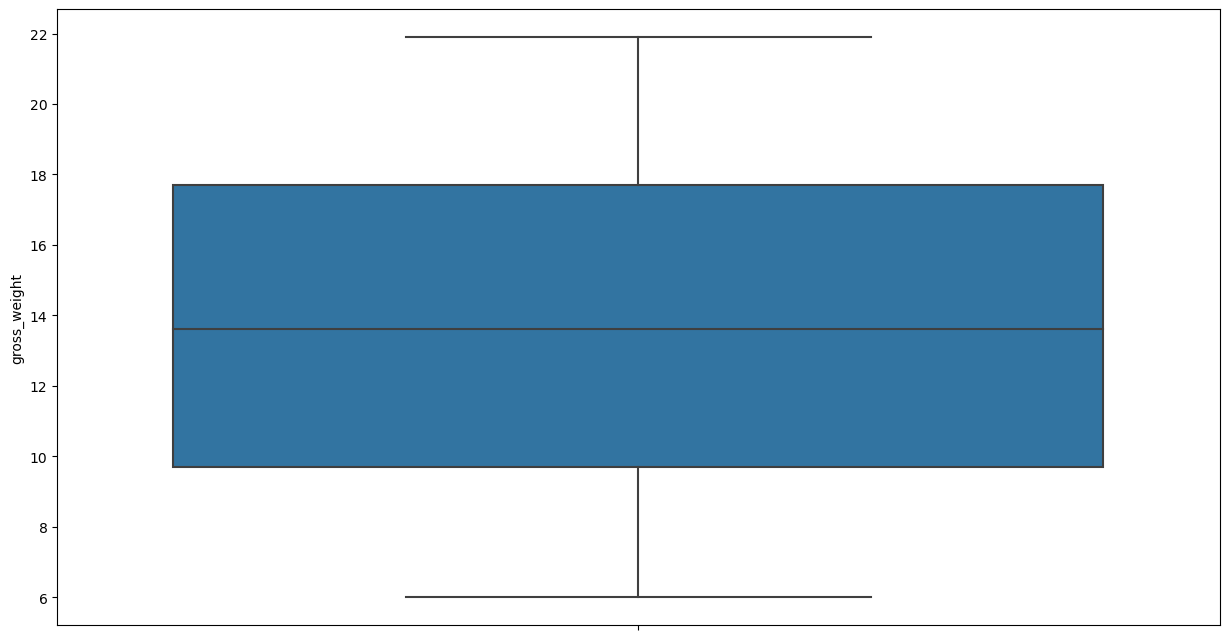

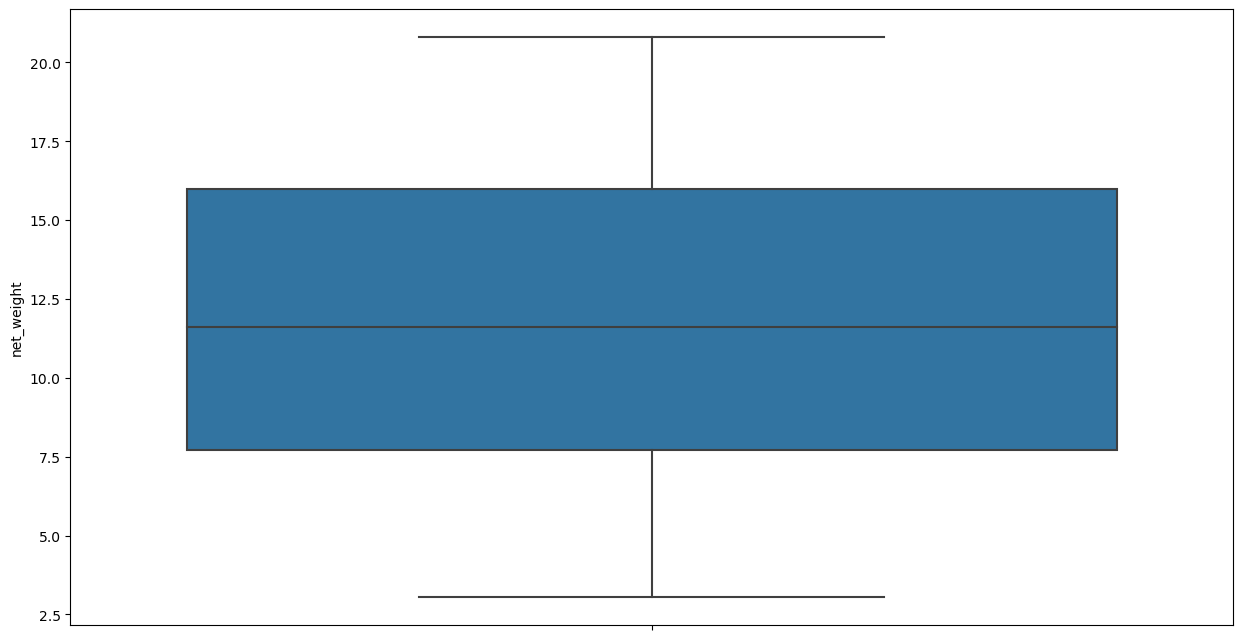

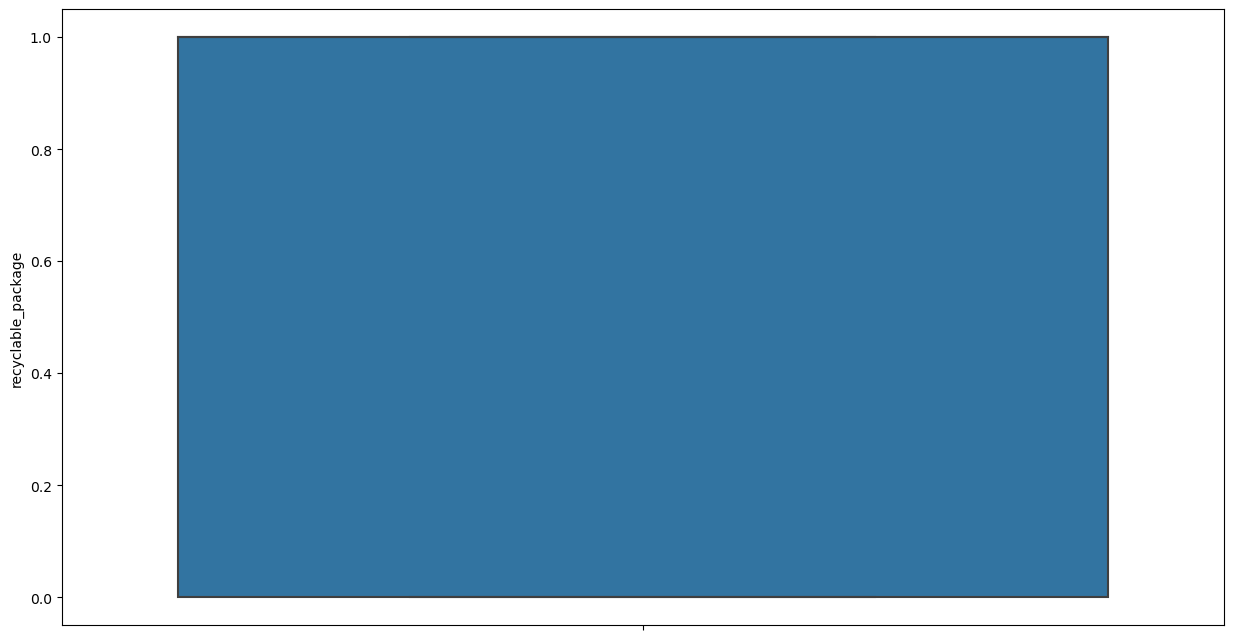

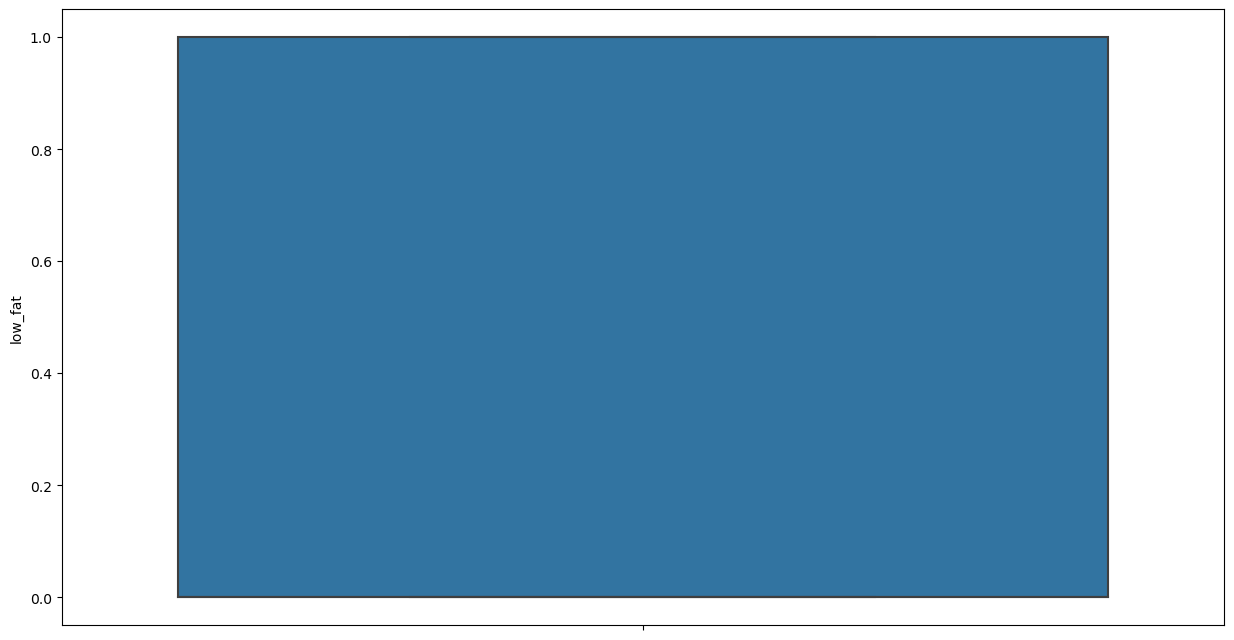

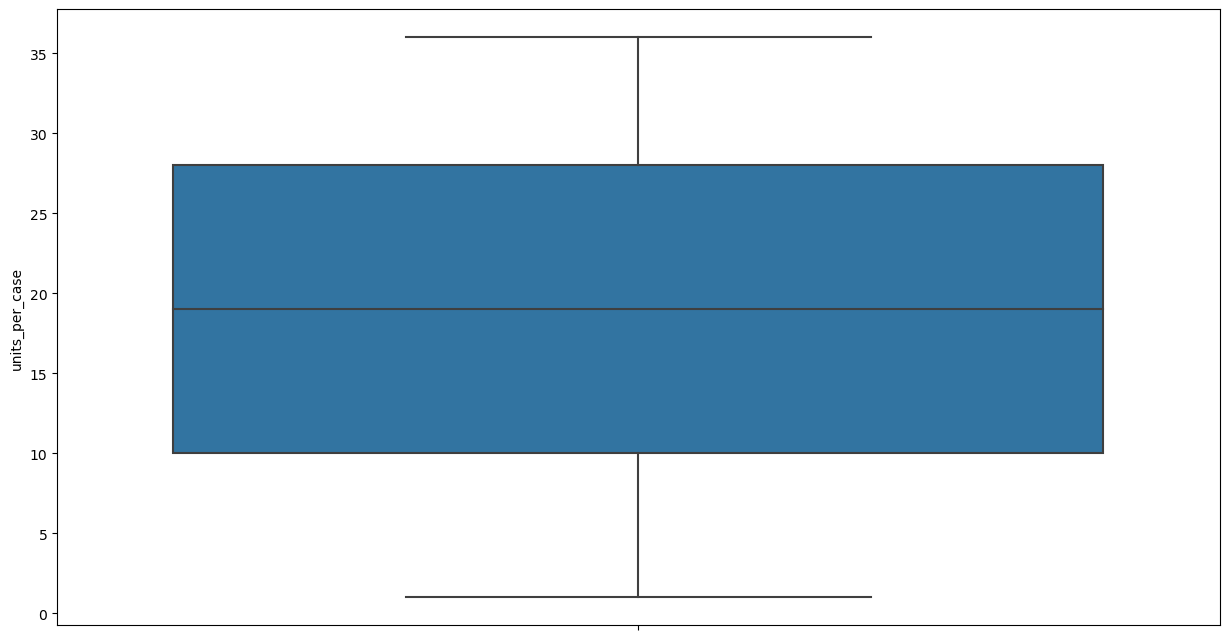

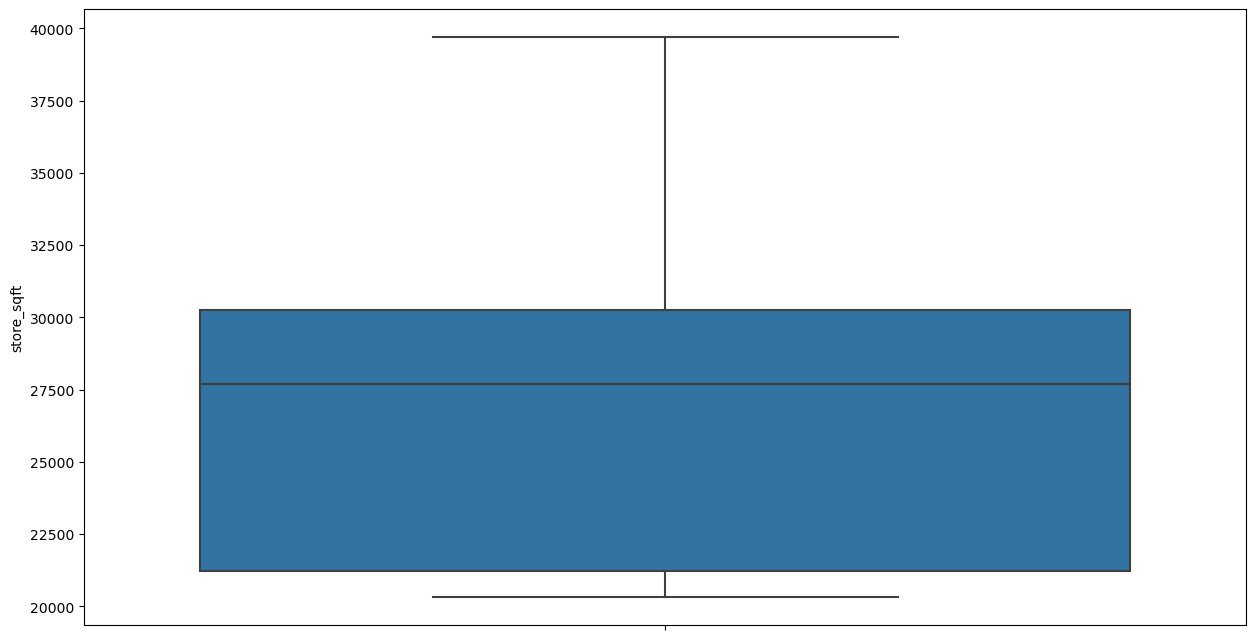

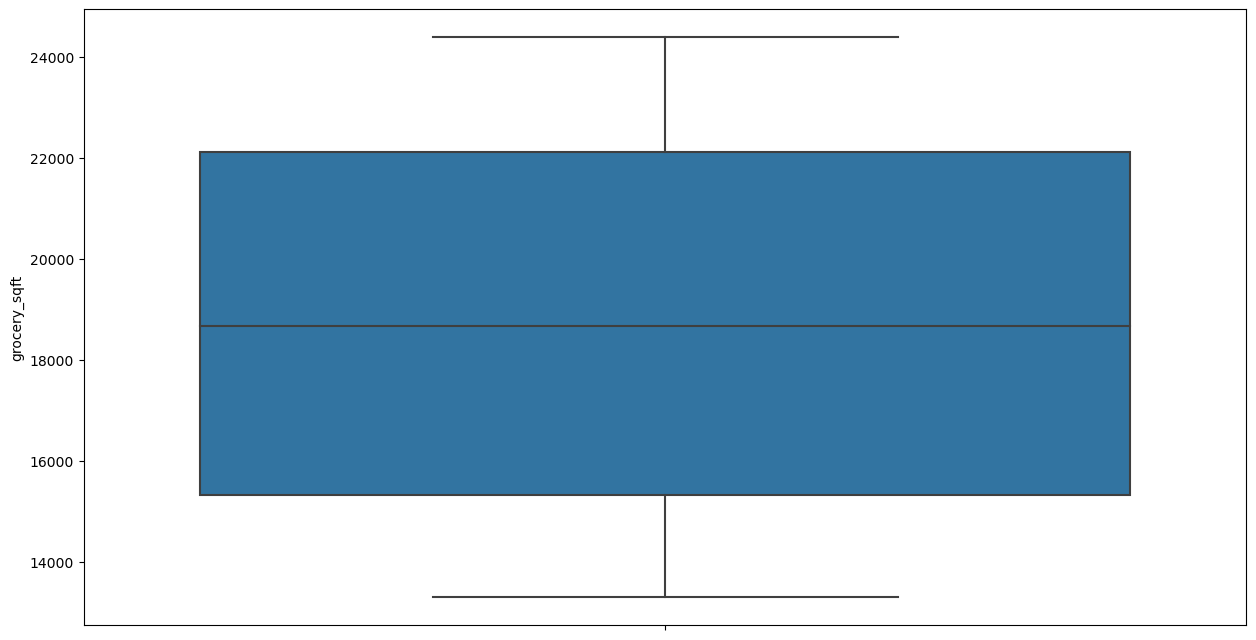

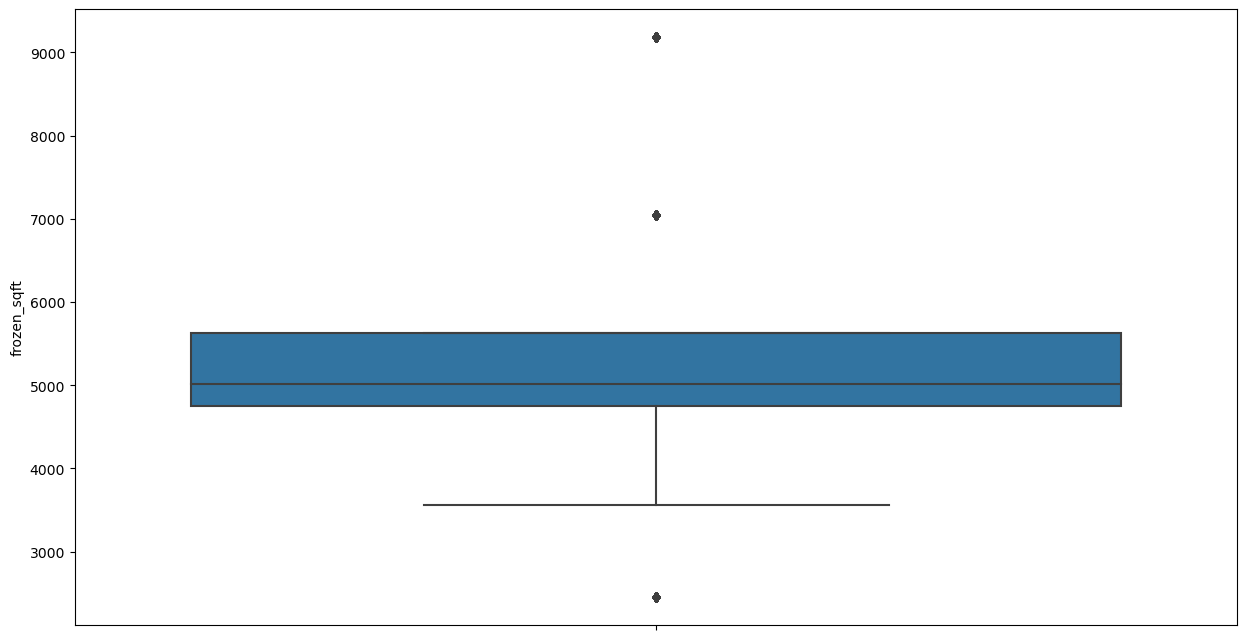

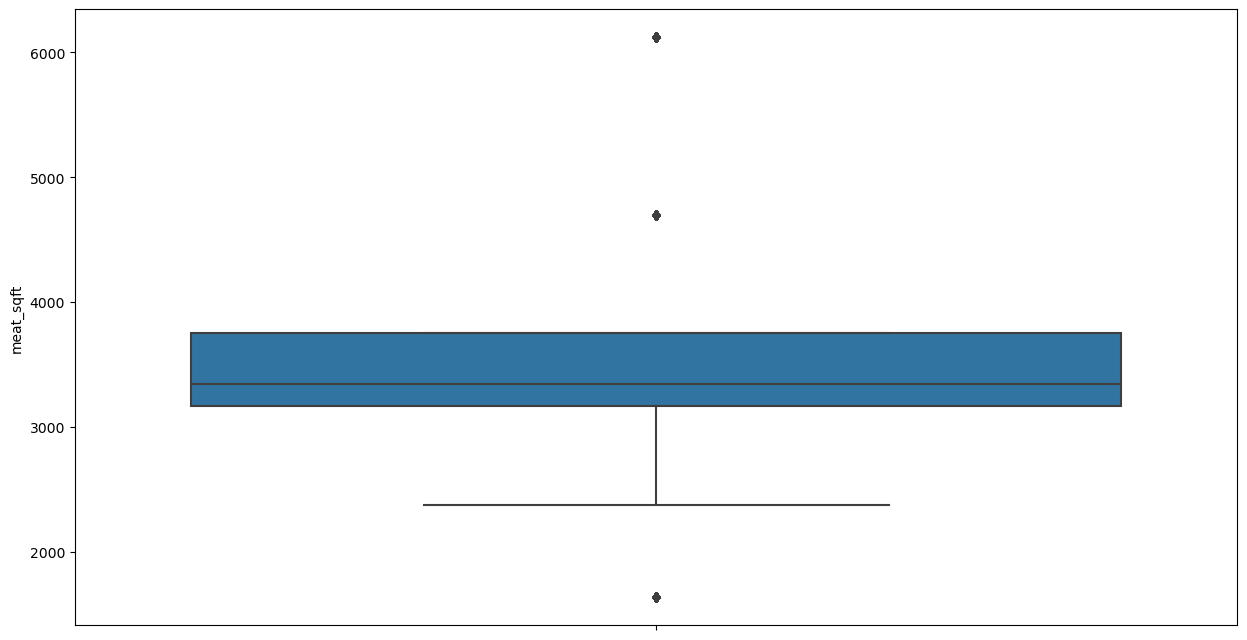

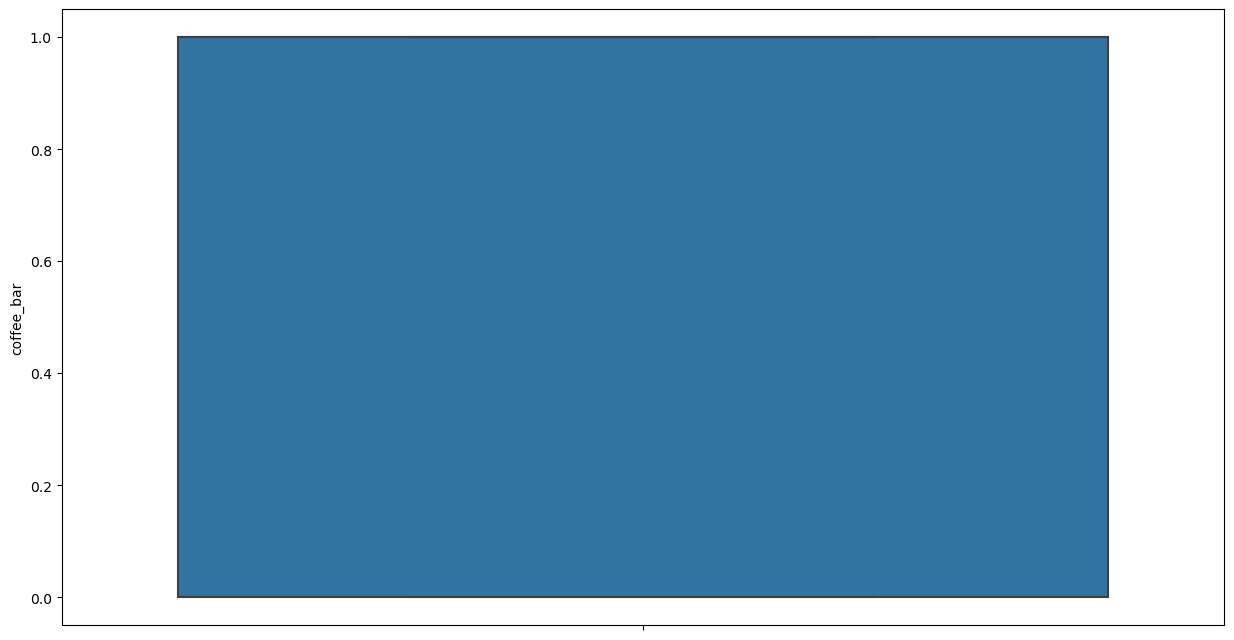

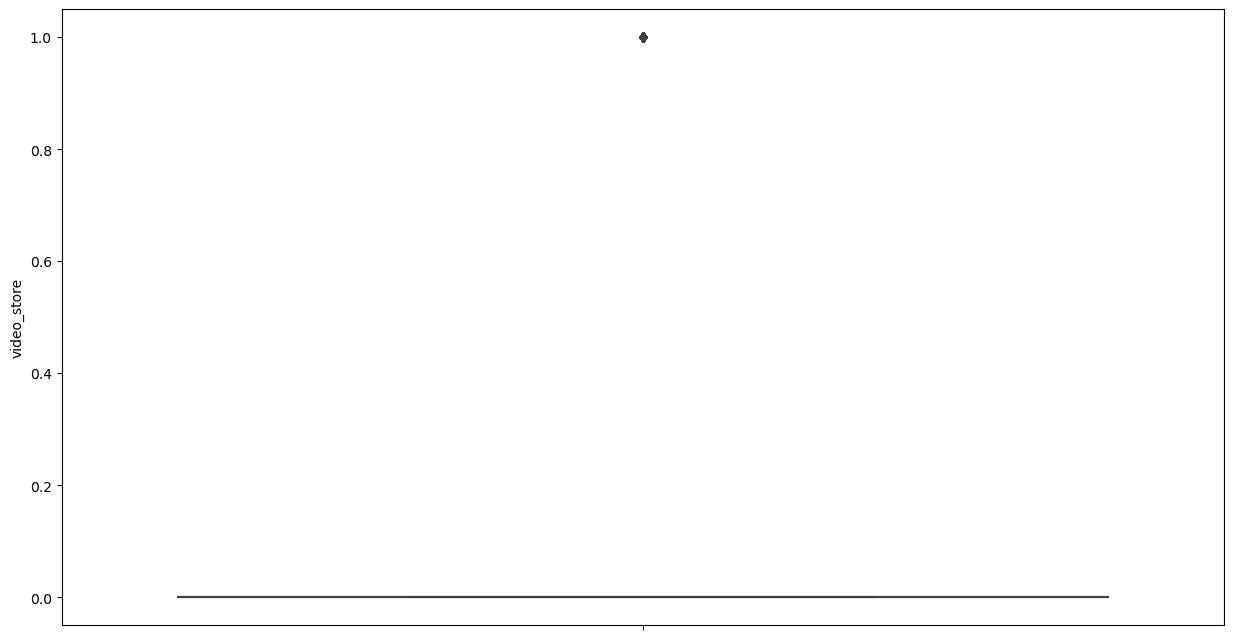

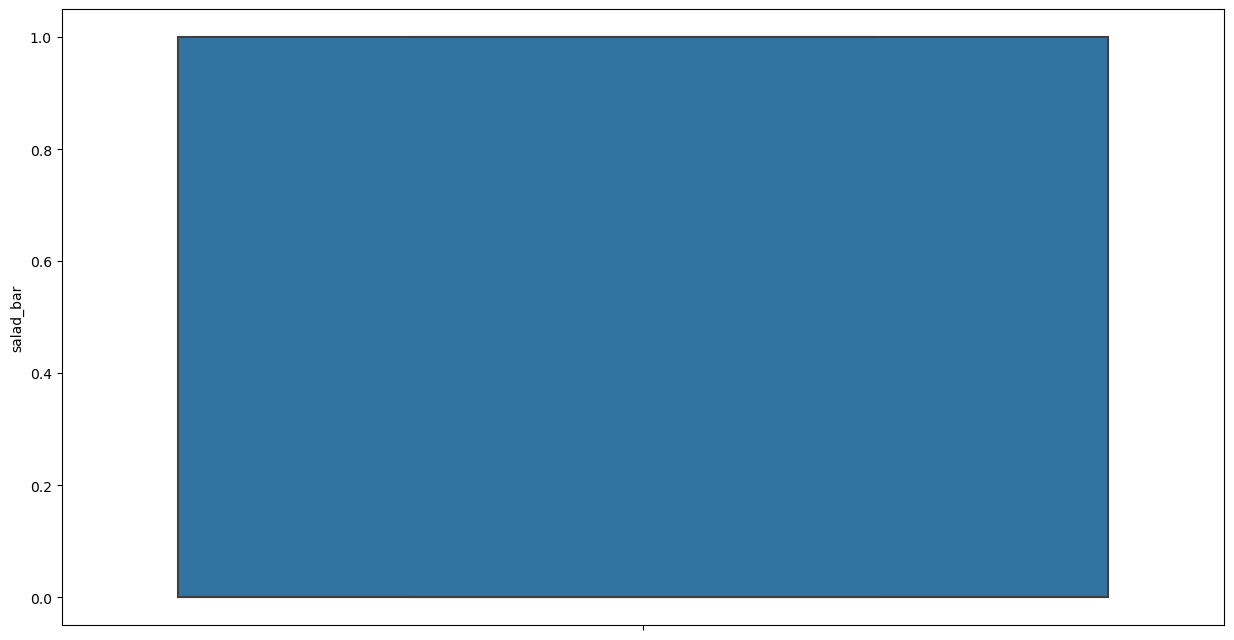

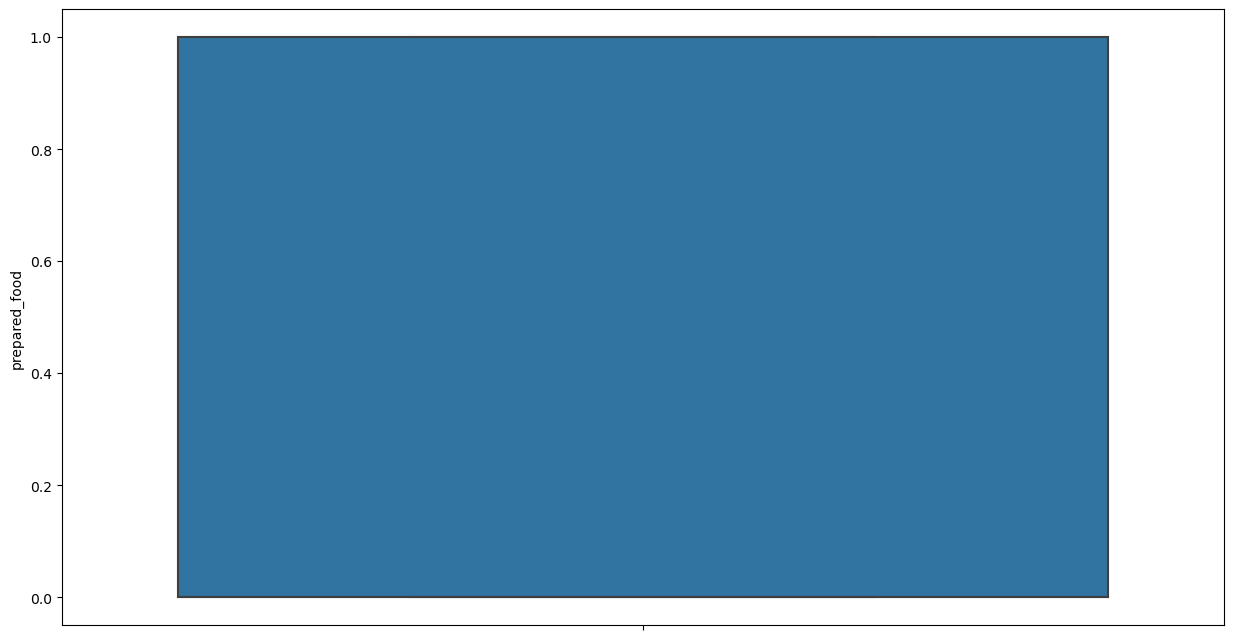

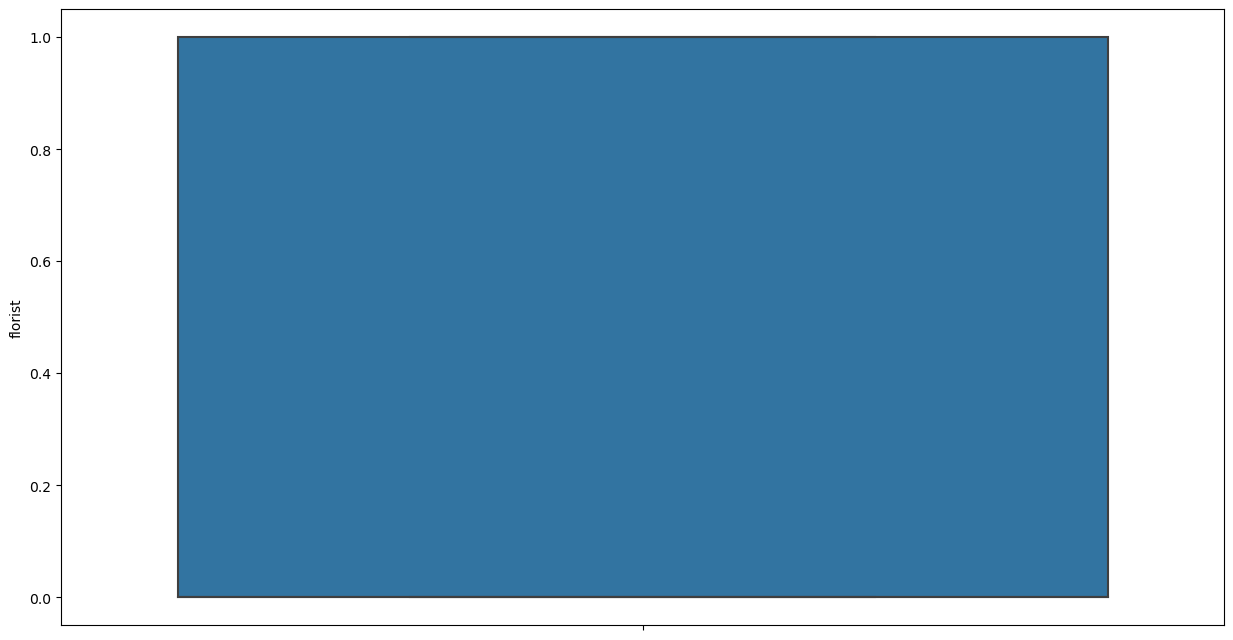

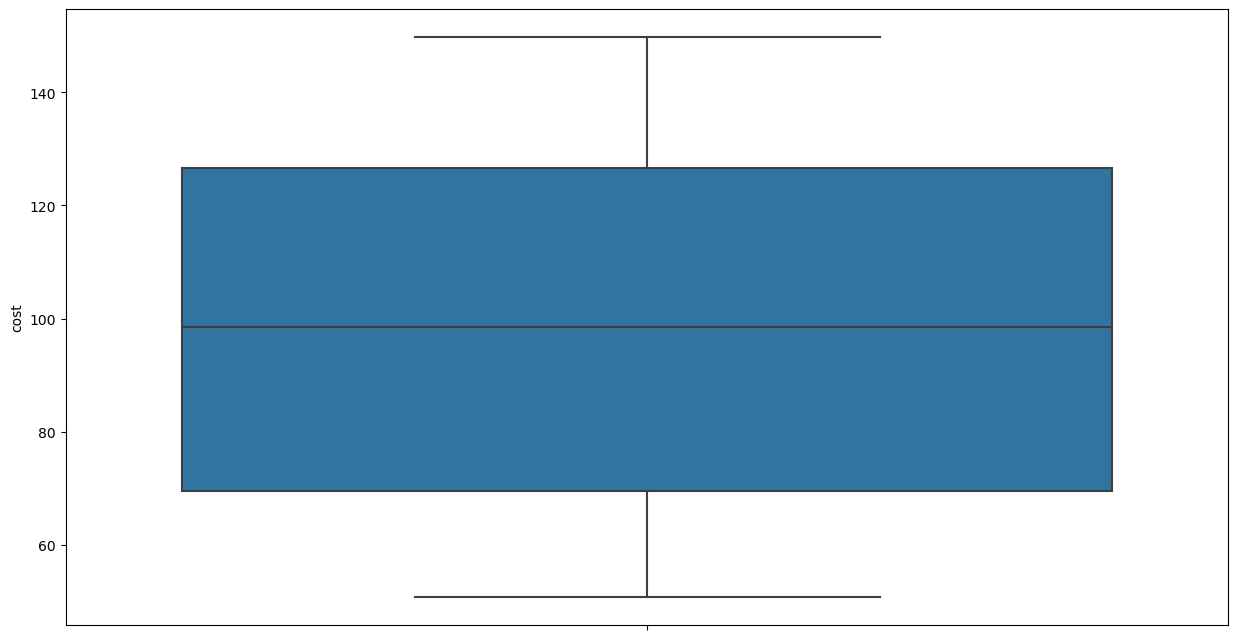

In [10]:
for i in num_cols:
    sns.boxplot(y=usdata[i])
    plt.show()

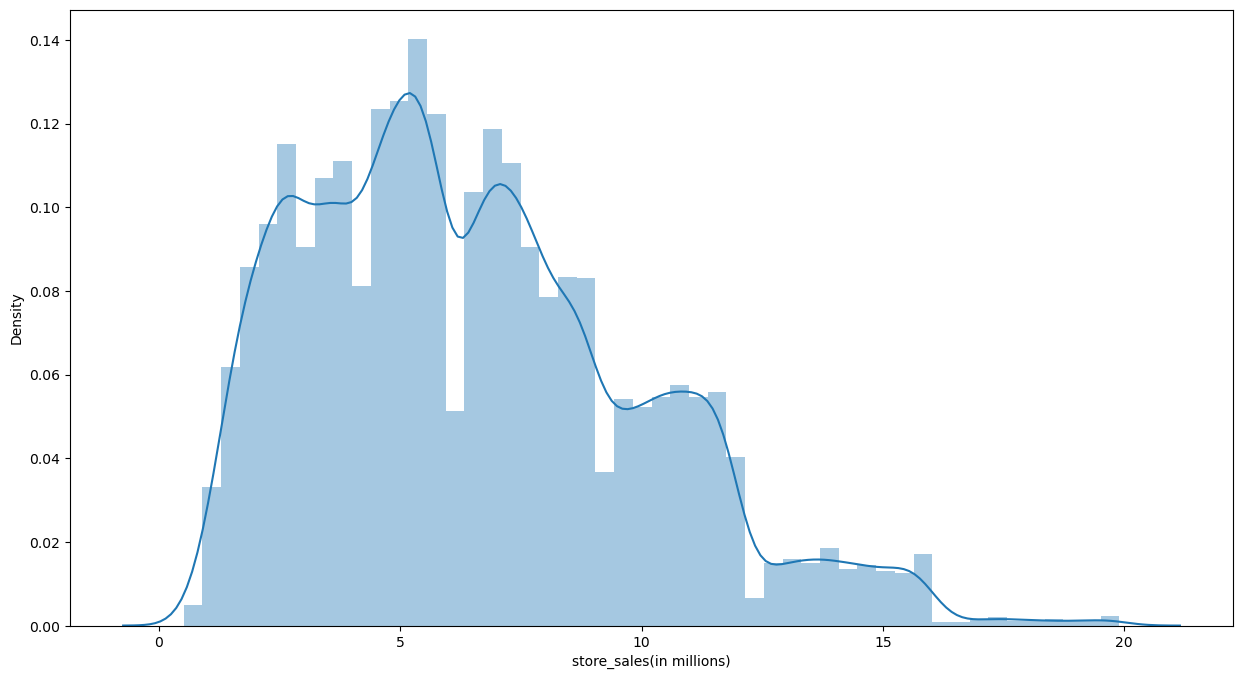

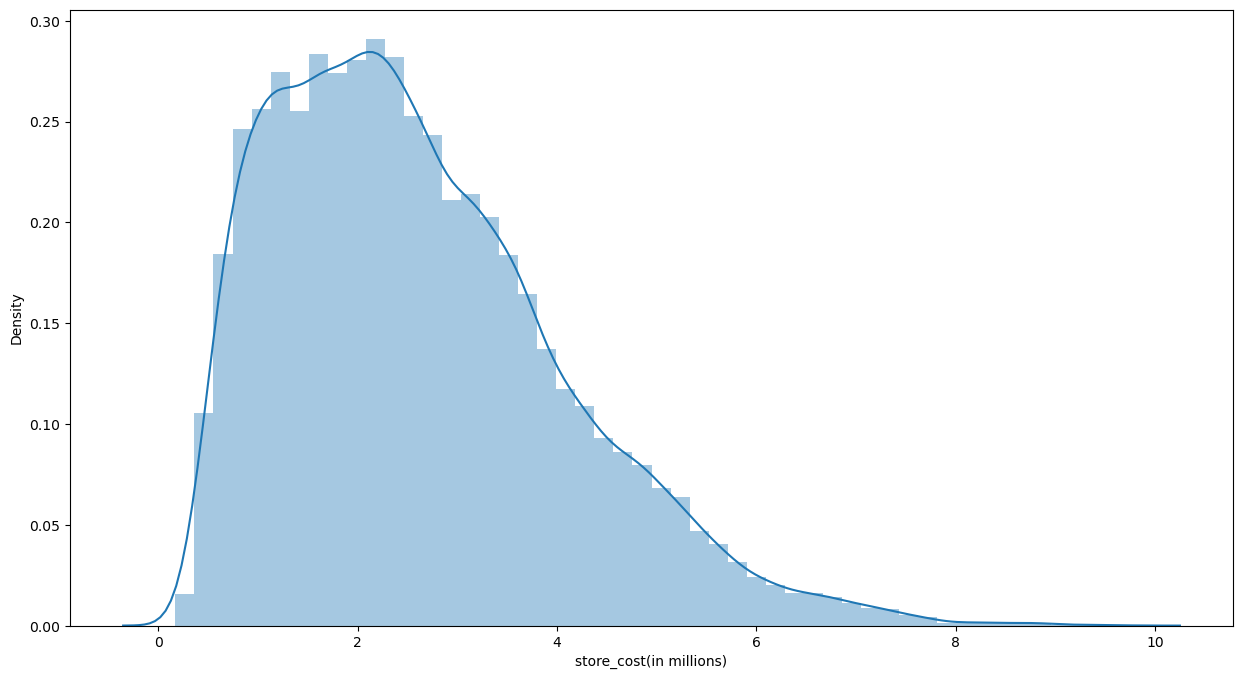

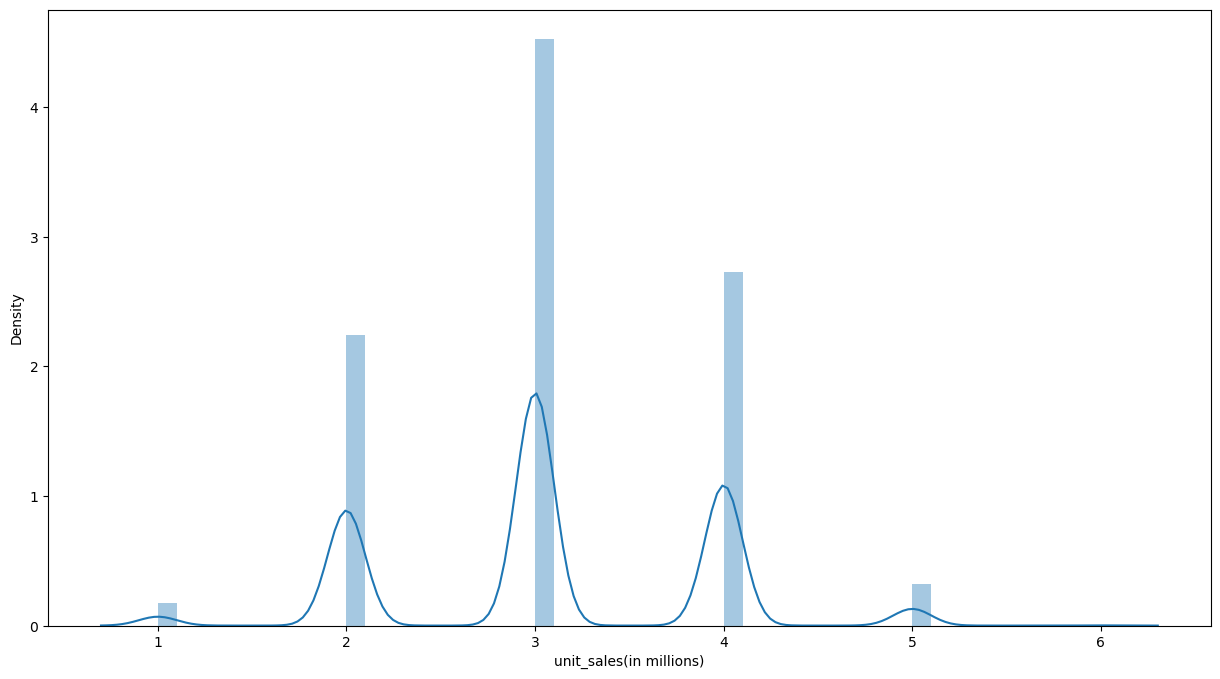

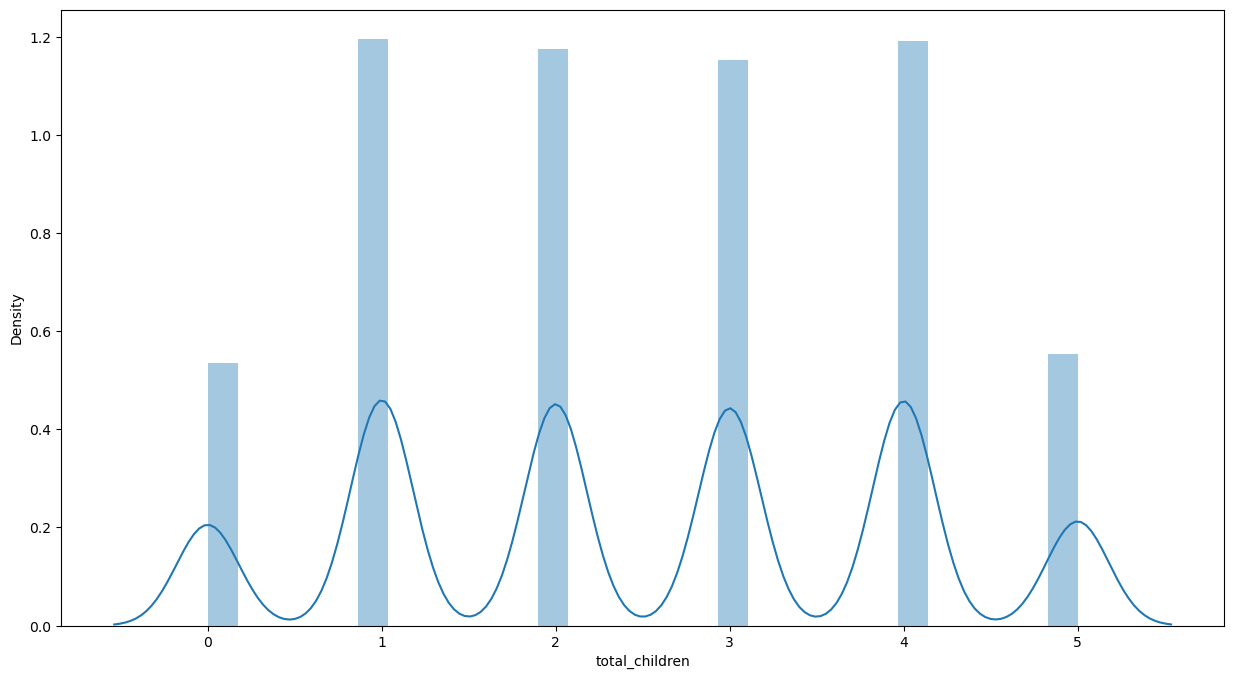

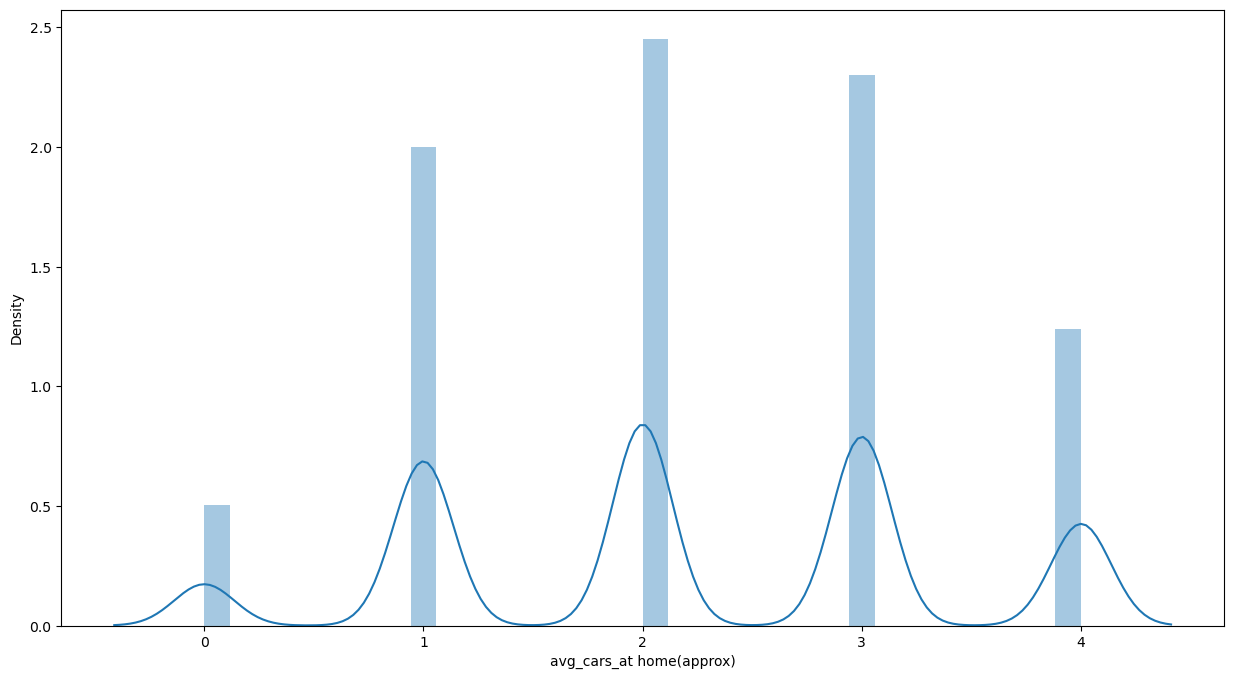

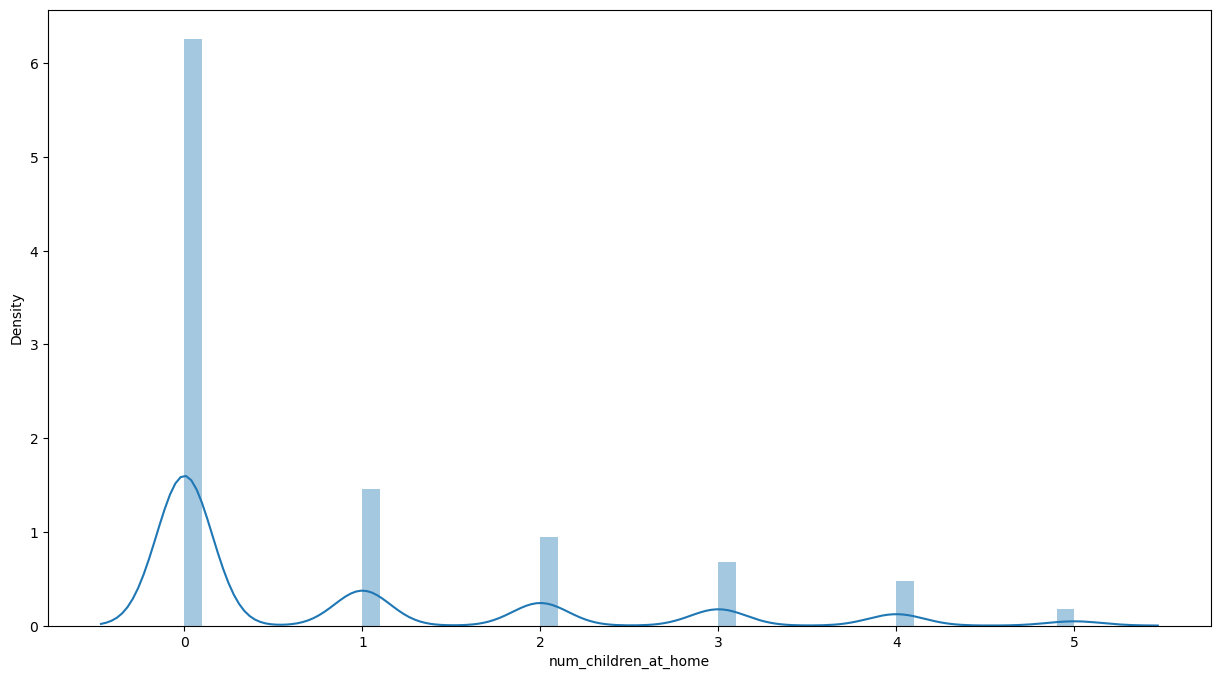

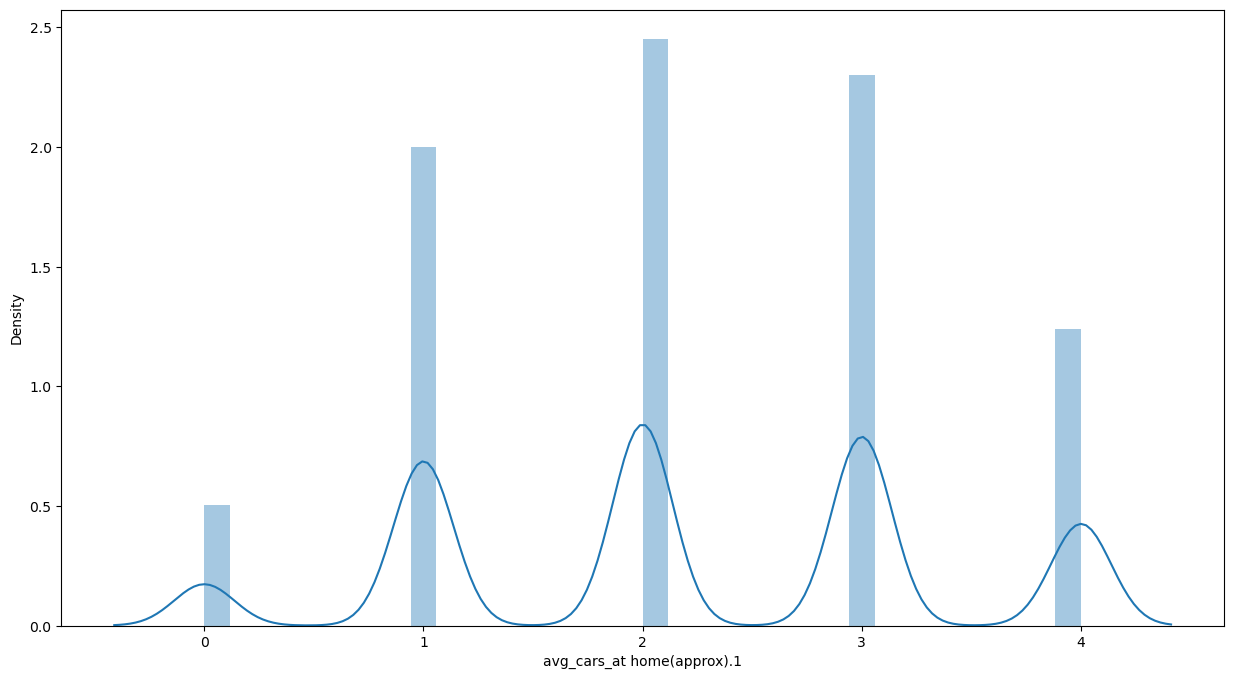

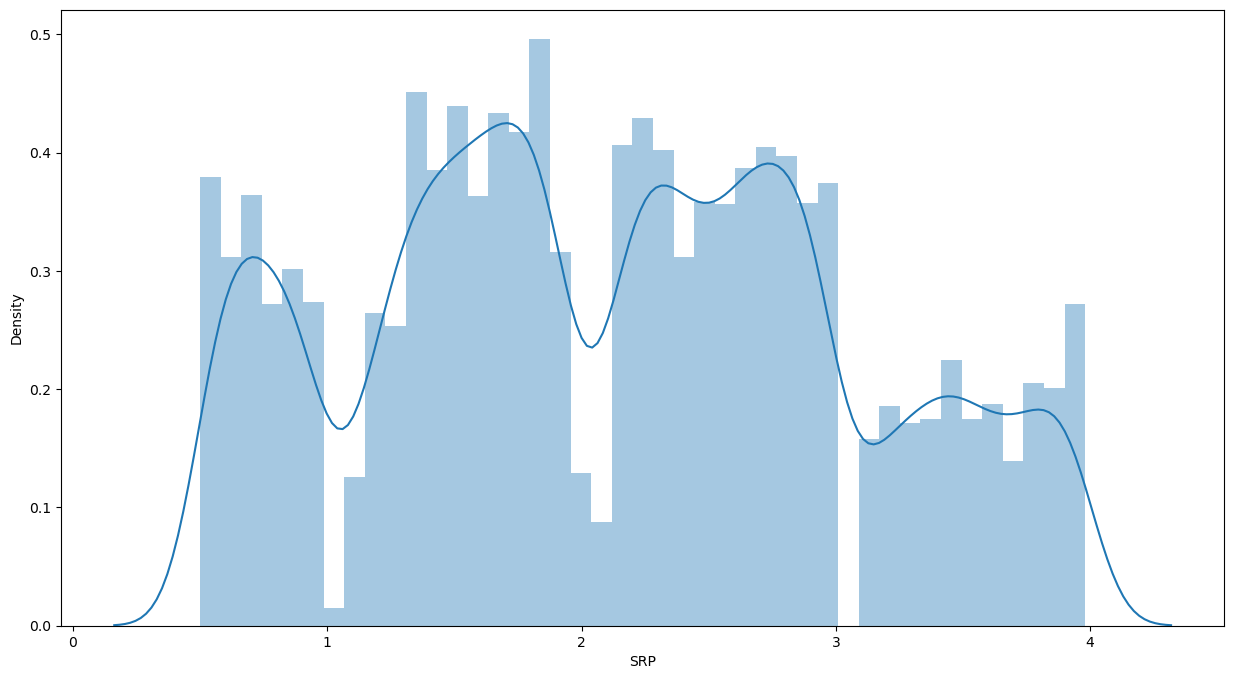

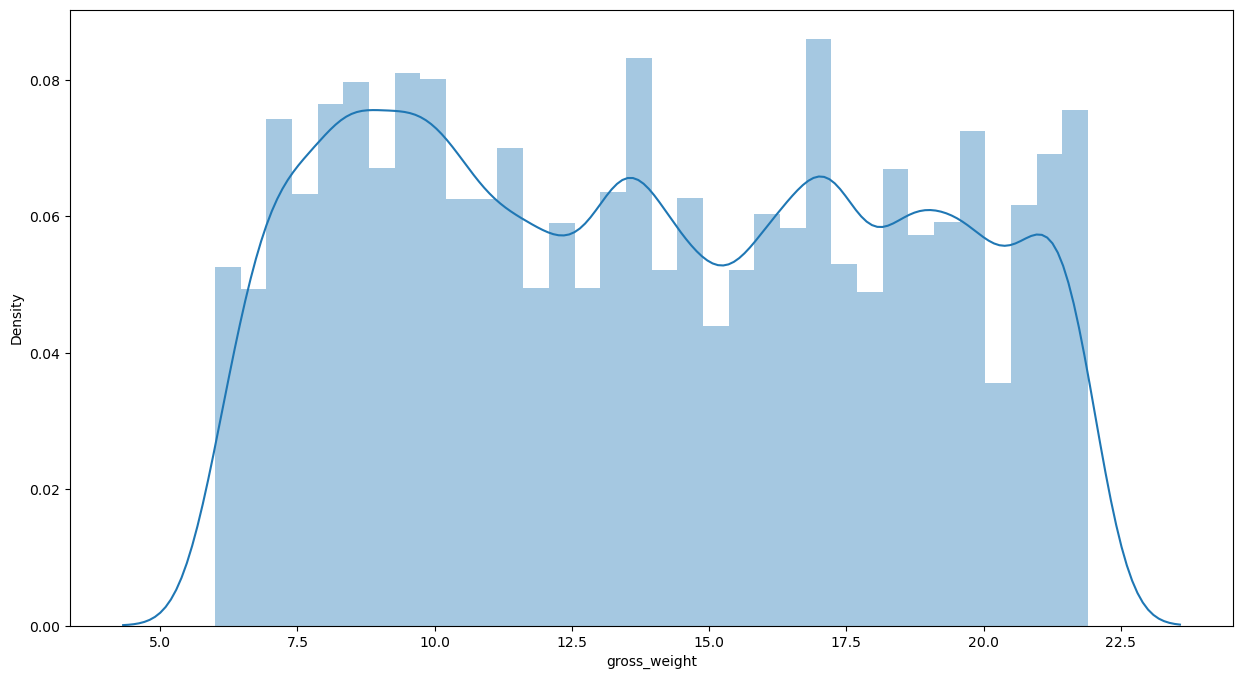

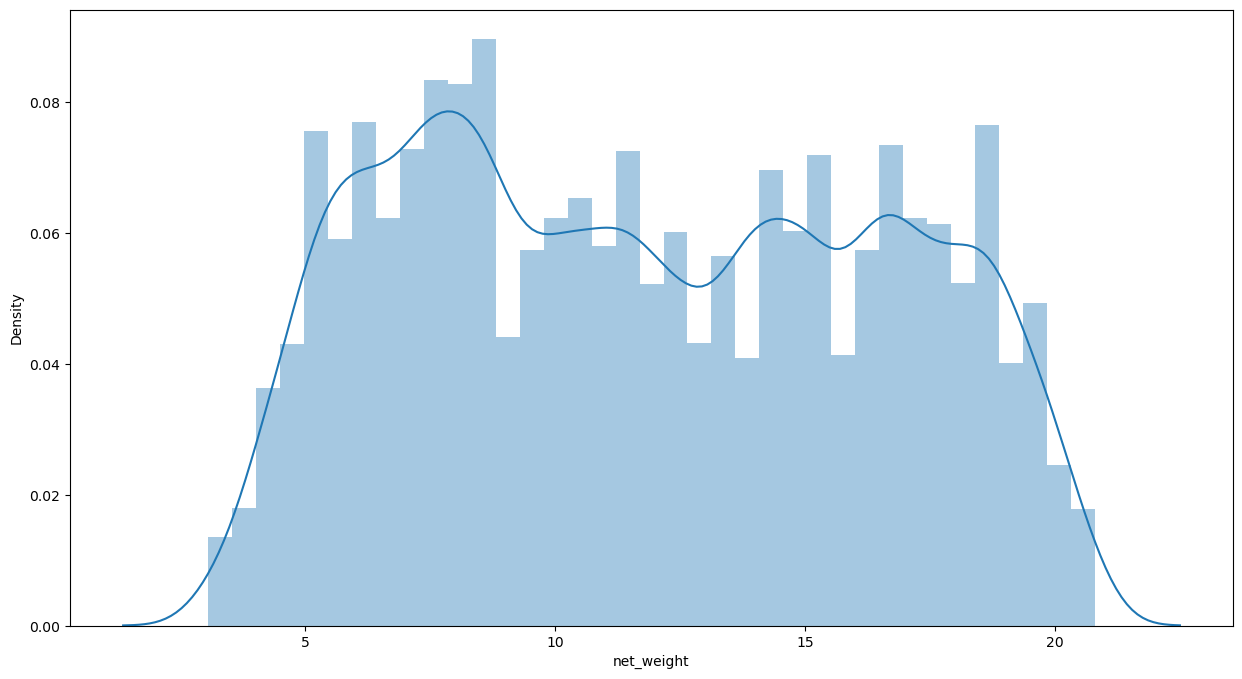

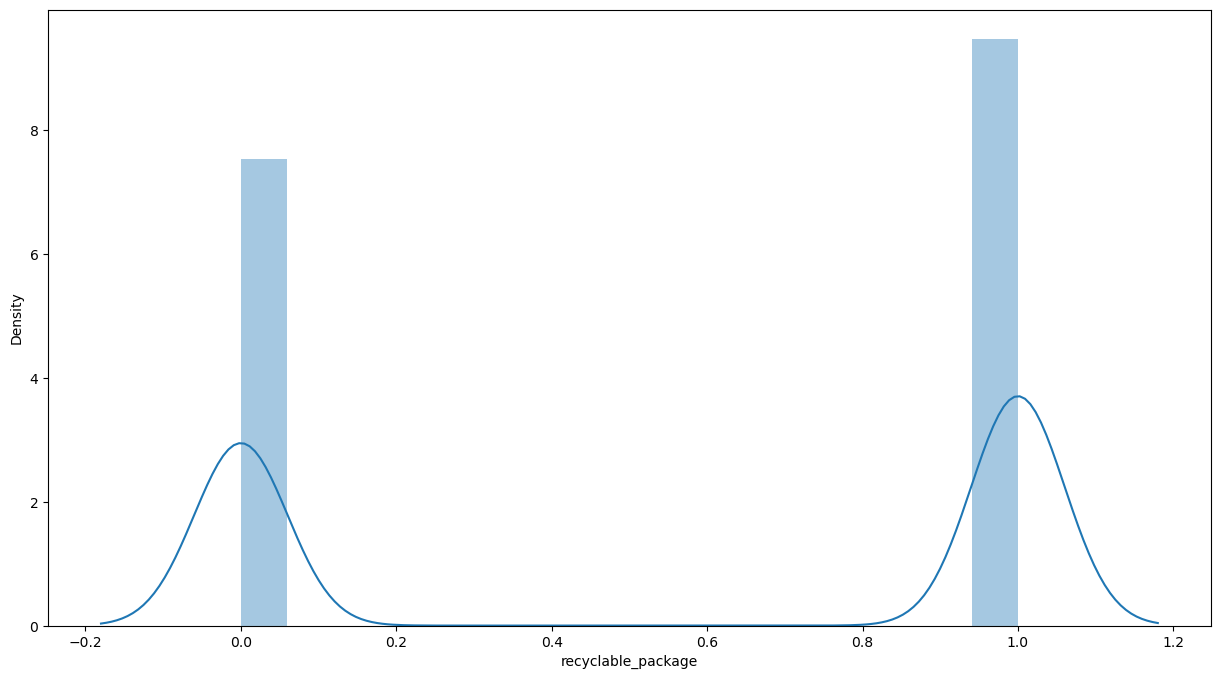

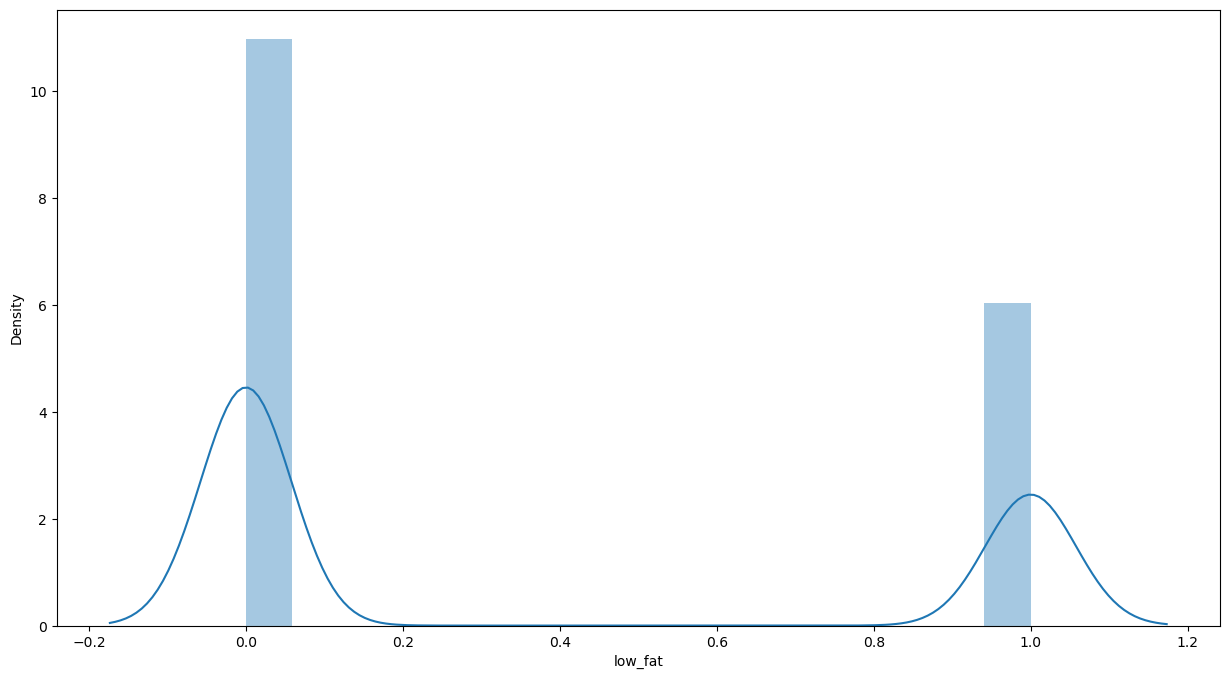

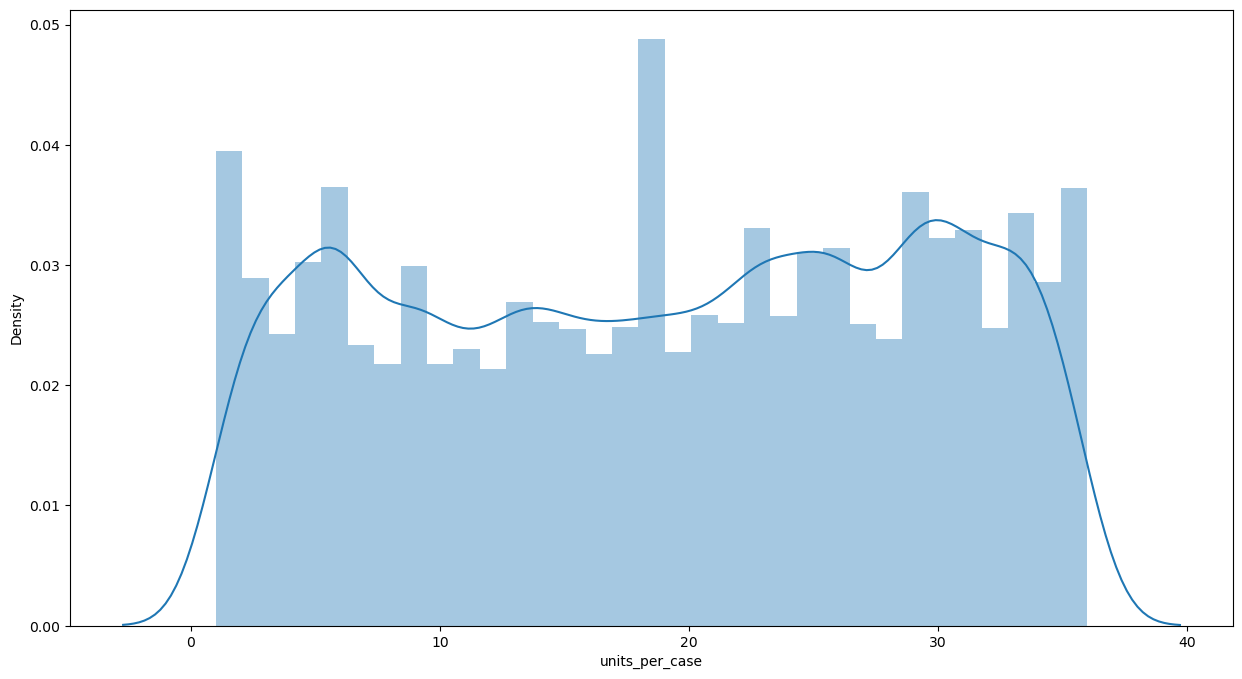

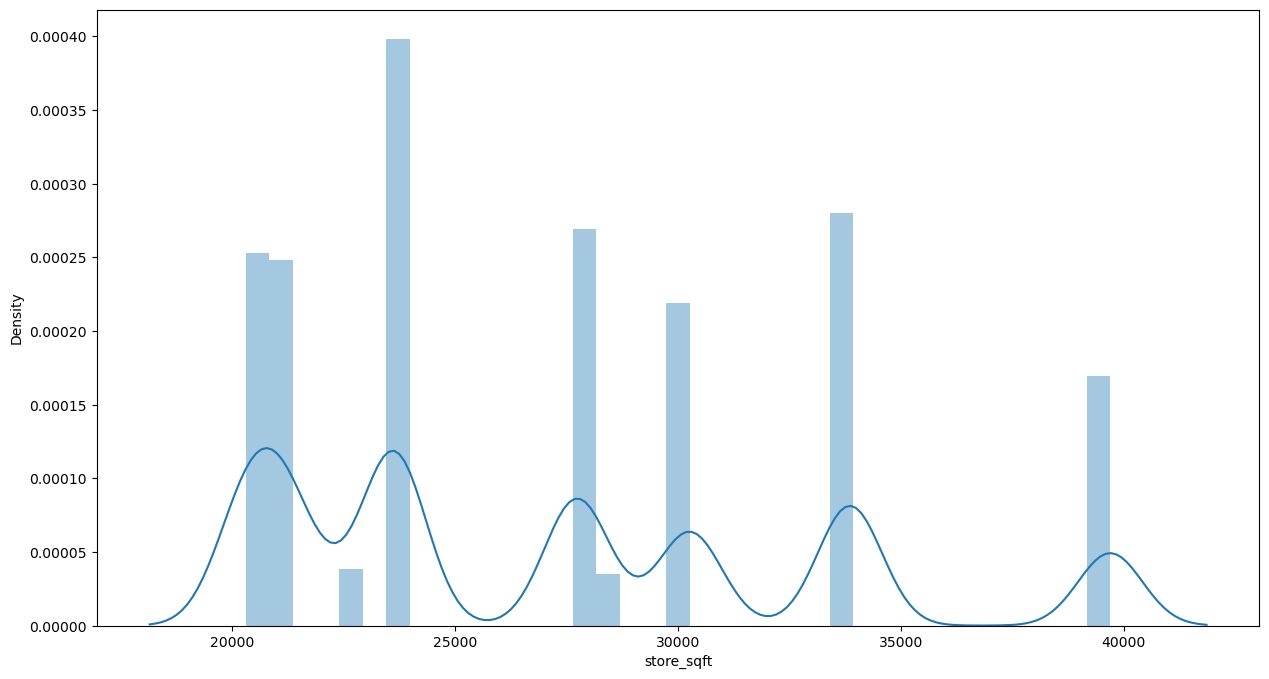

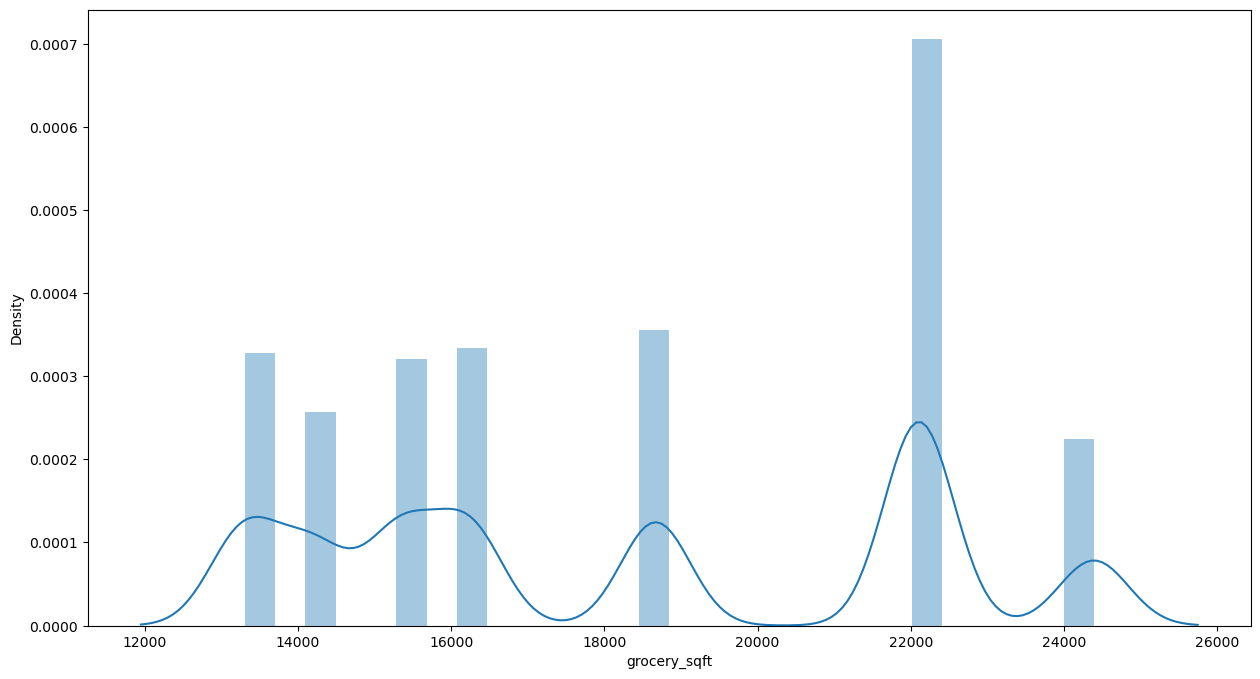

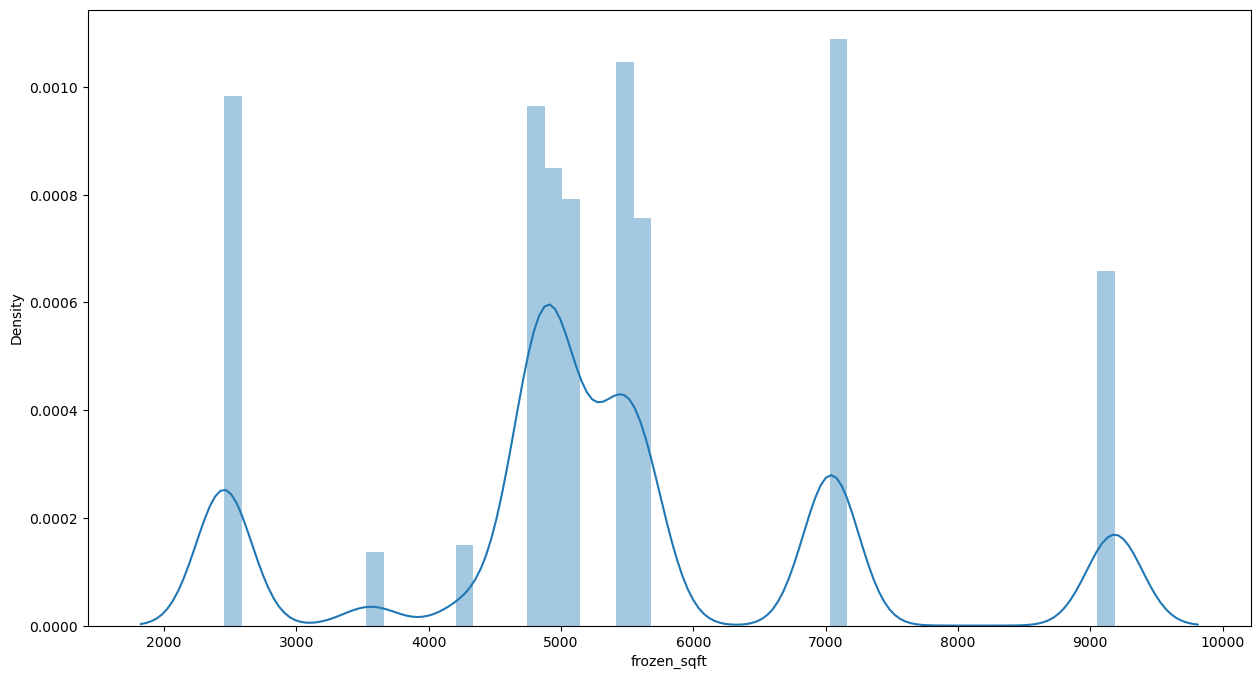

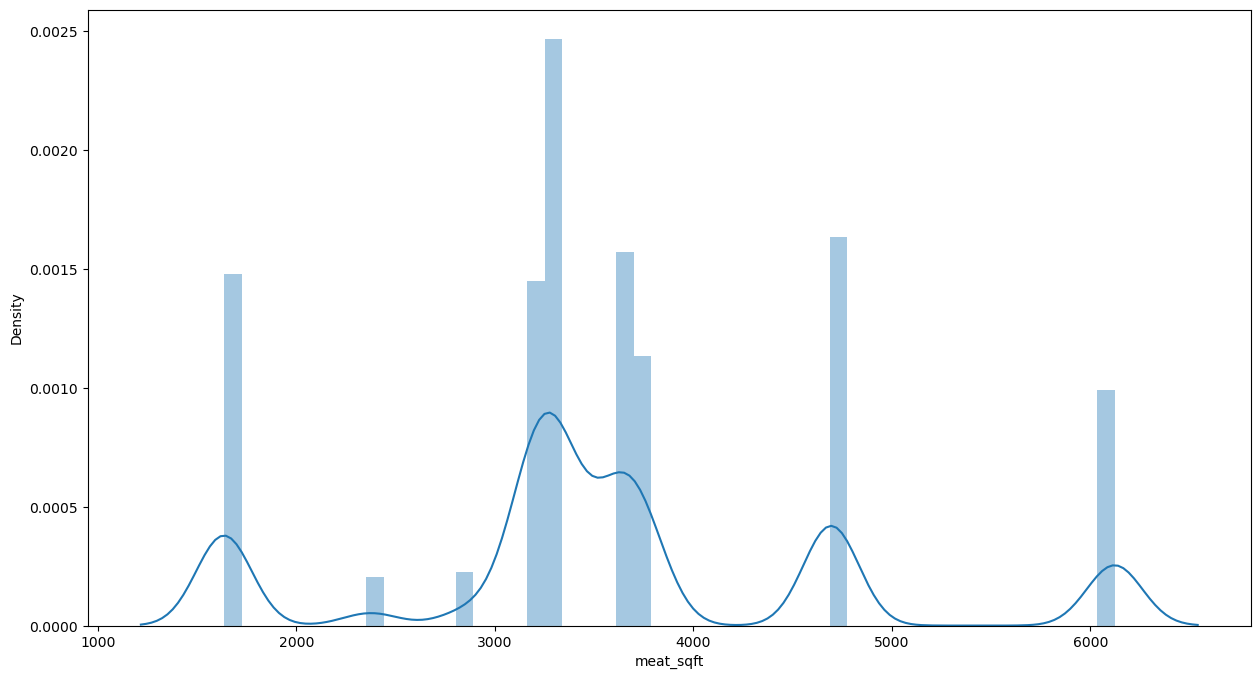

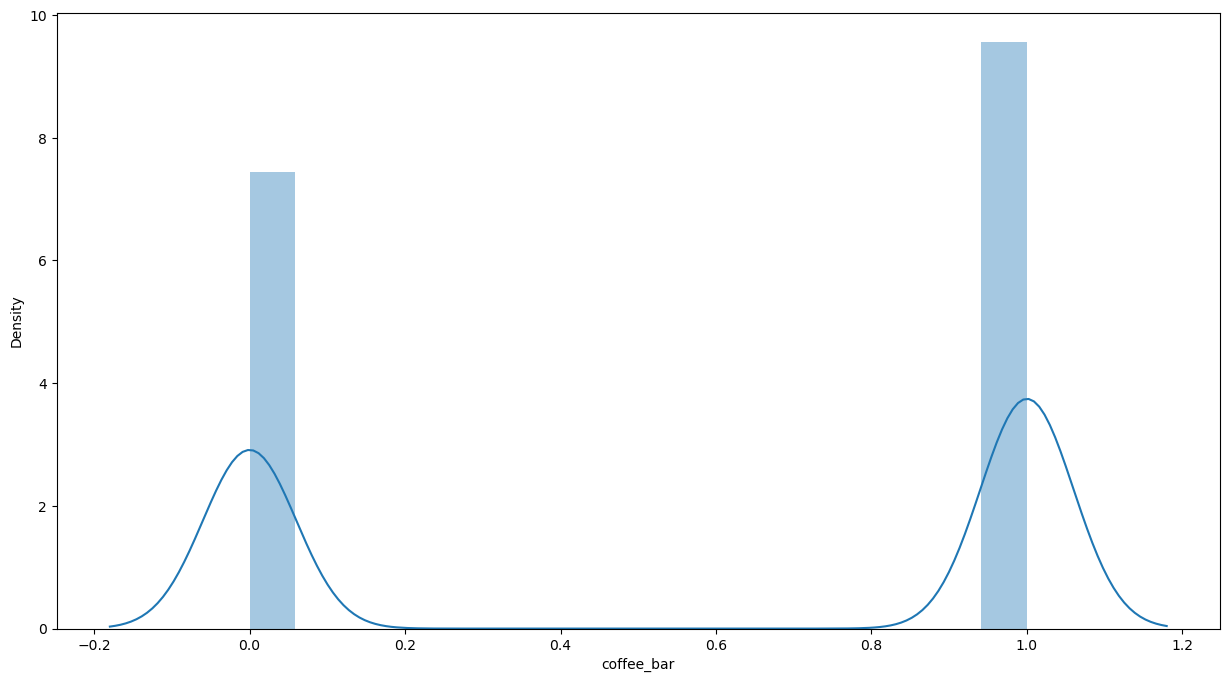

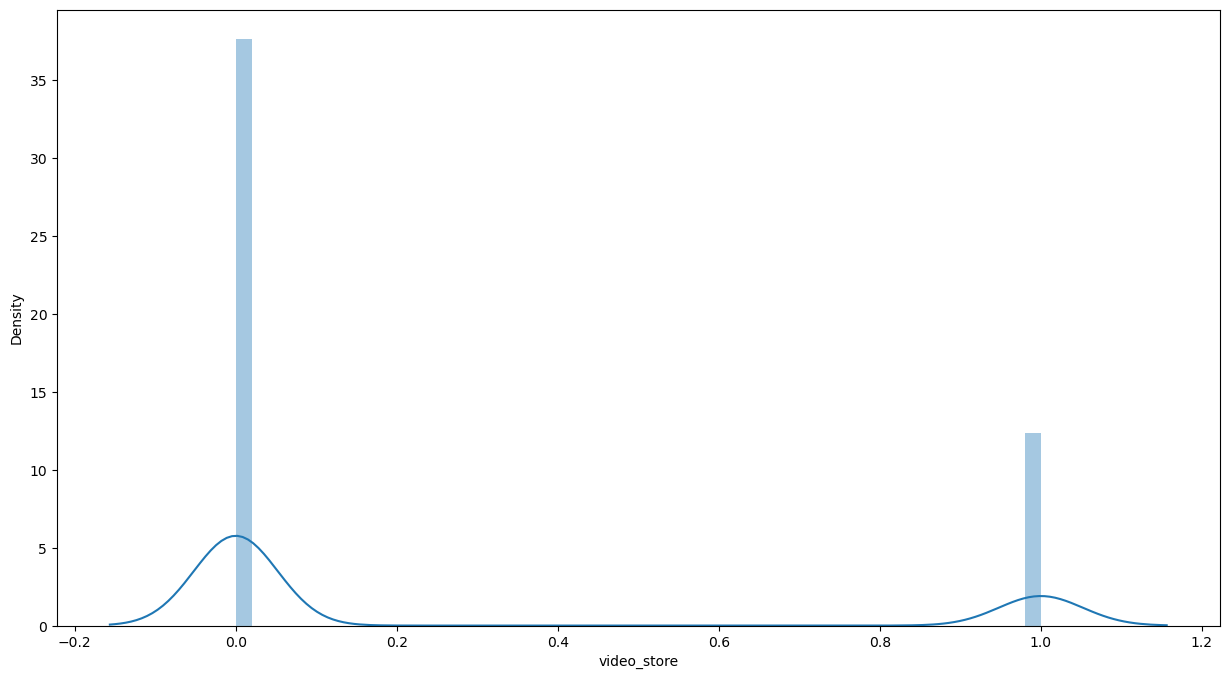

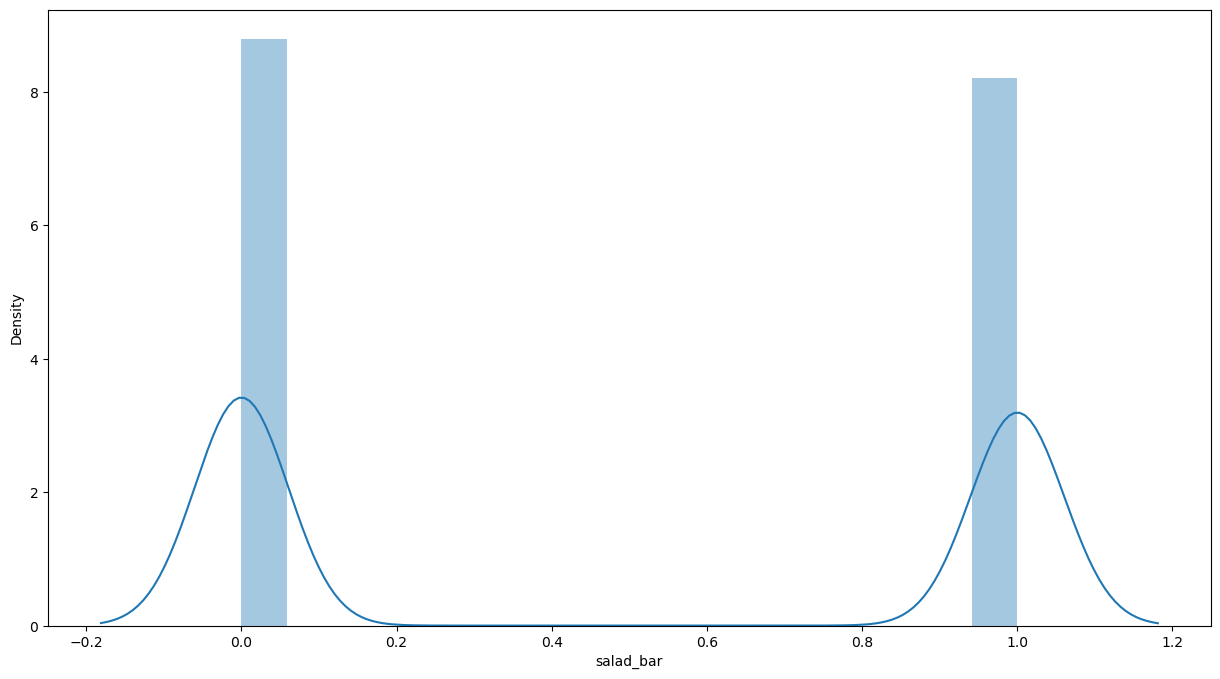

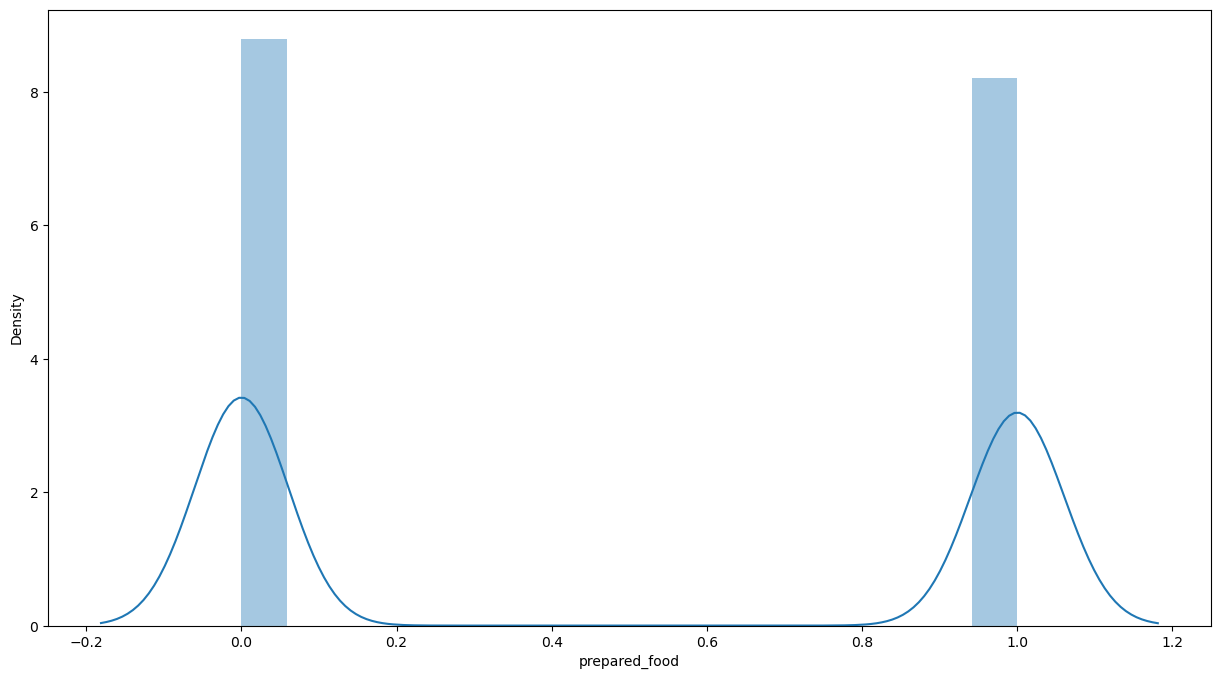

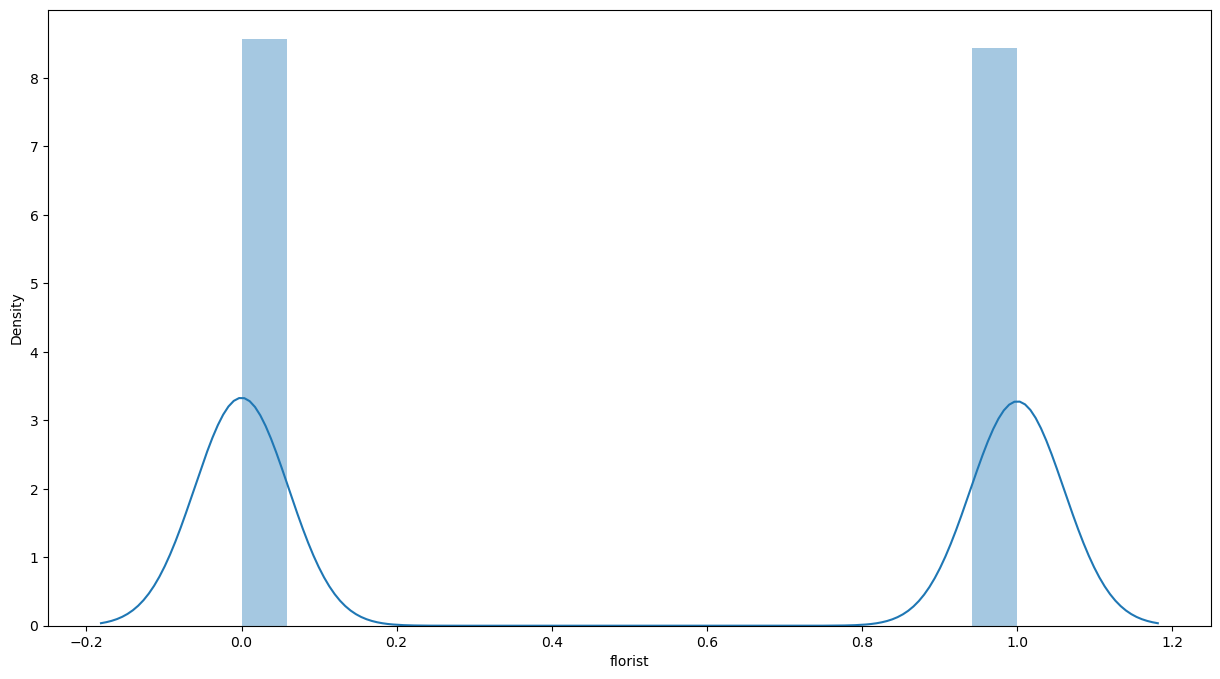

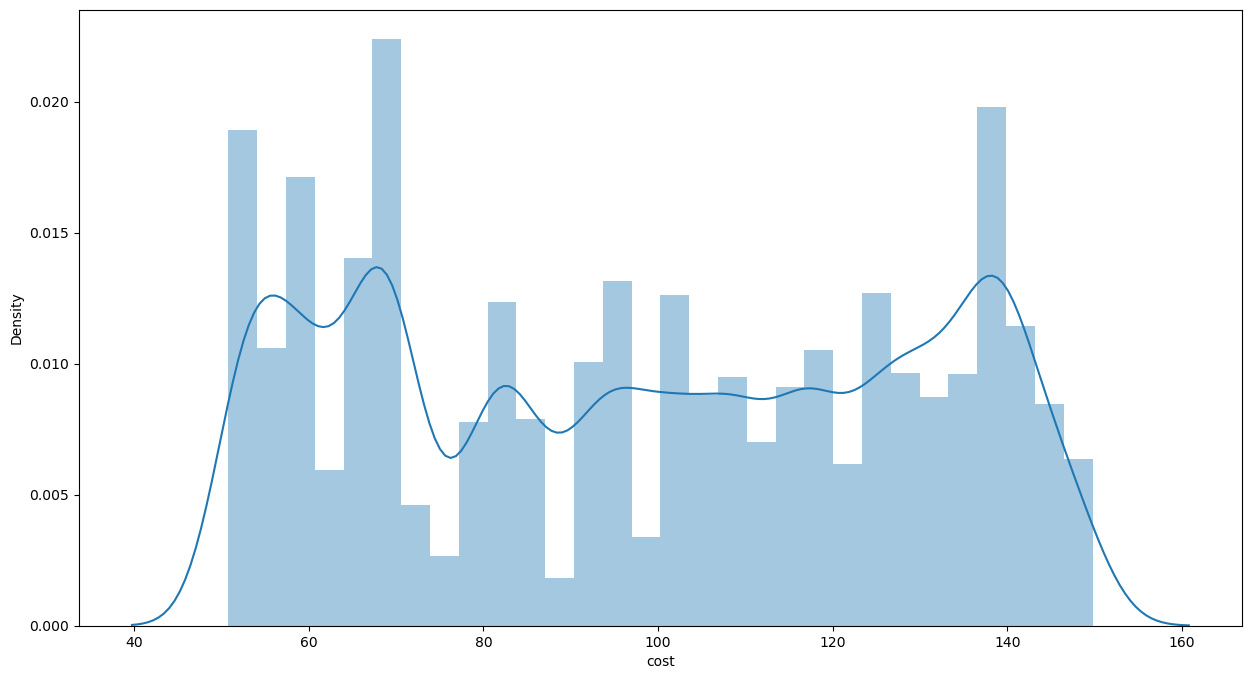

In [11]:
for i in num_cols:
    sns.distplot(usdata[i],kde=True)
    plt.show()

In [12]:
usdata.shape

(38892, 40)

In [13]:
cat_cols=data.select_dtypes(exclude=np.number).columns.to_list()

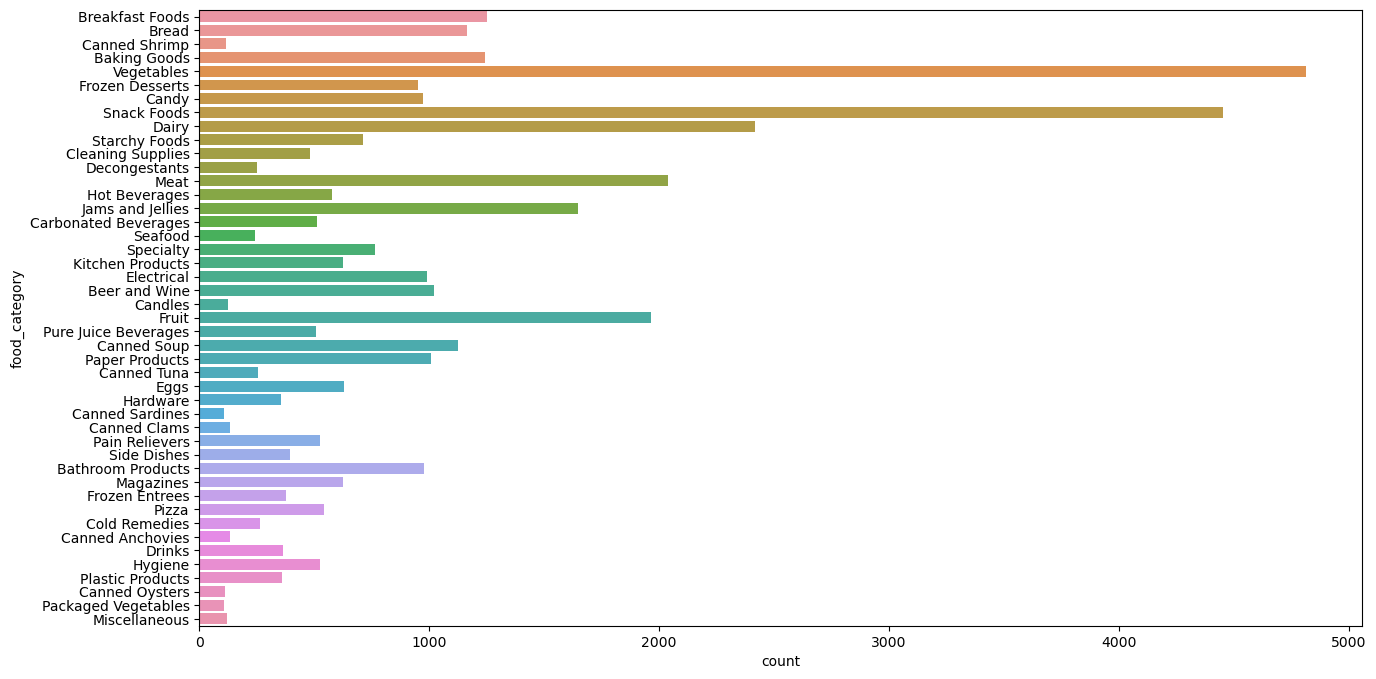

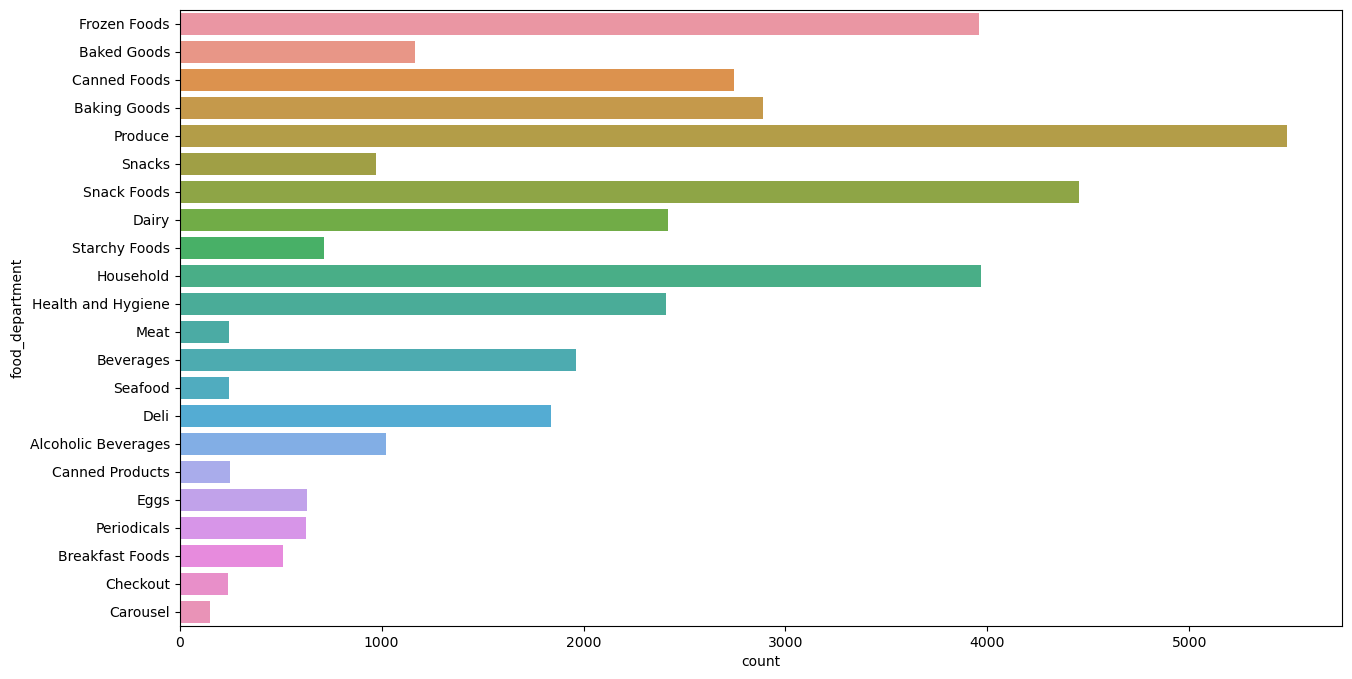

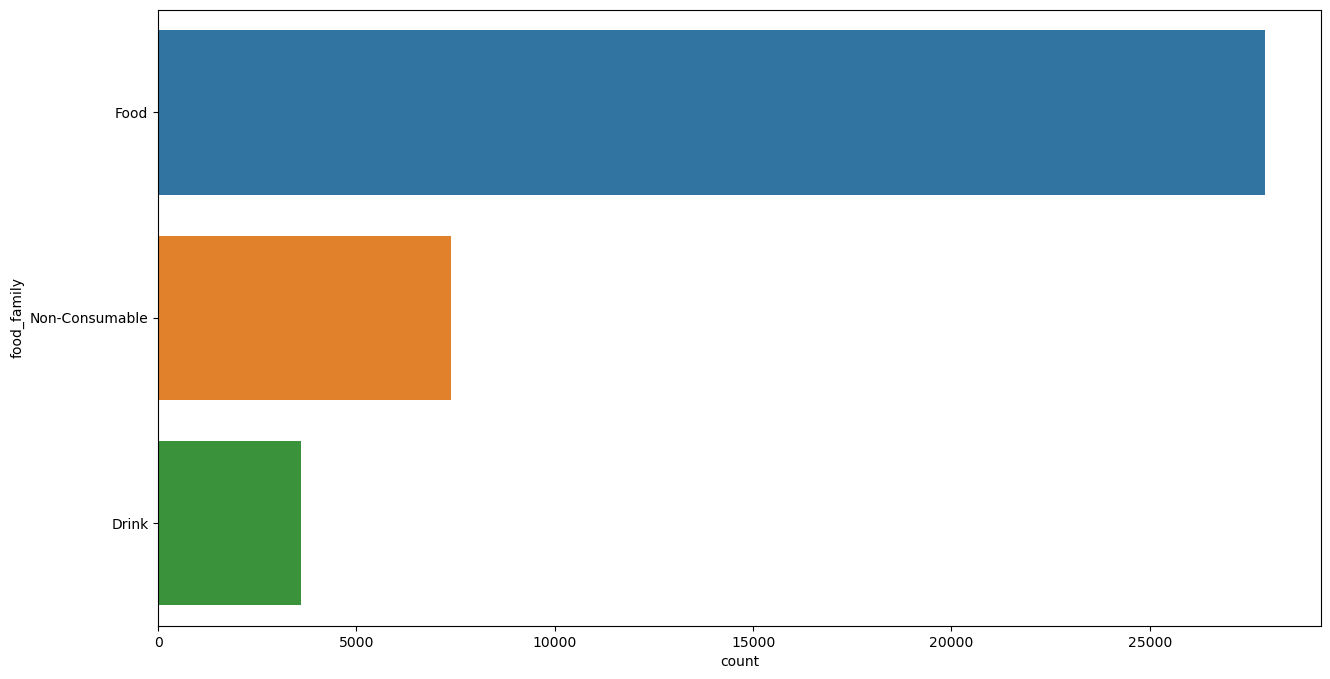

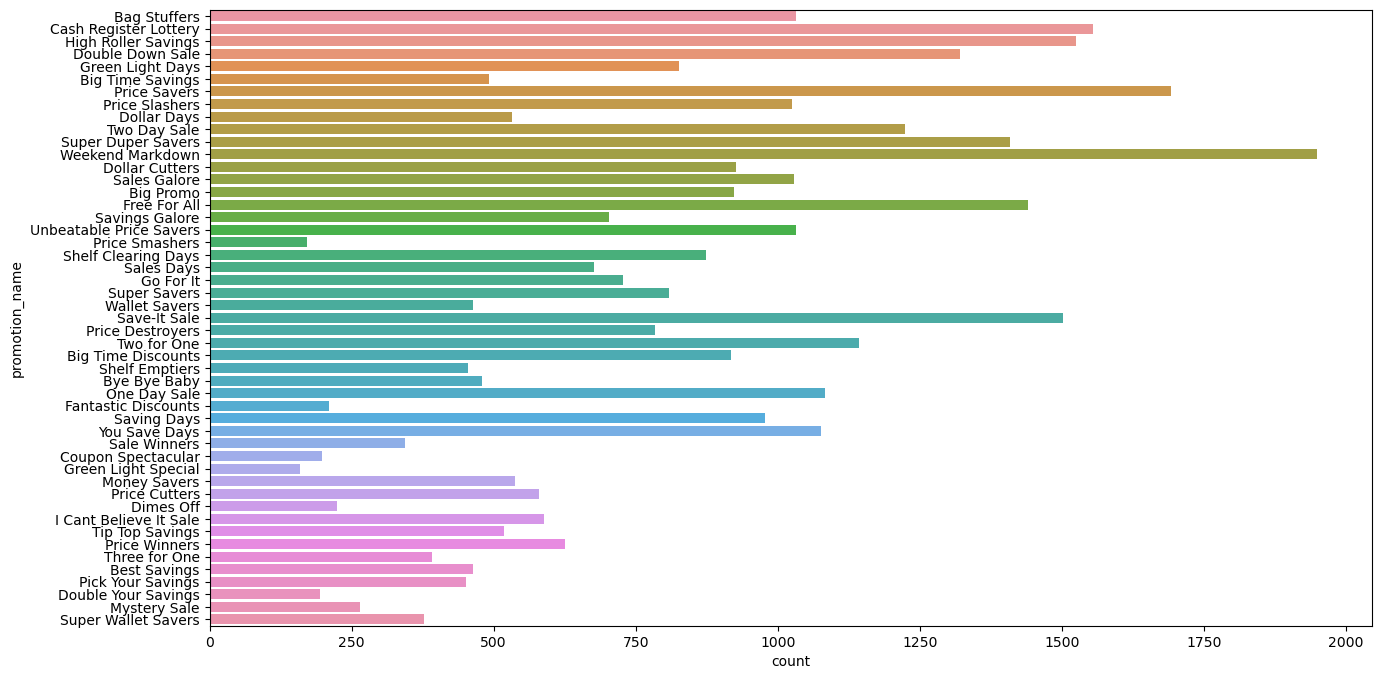

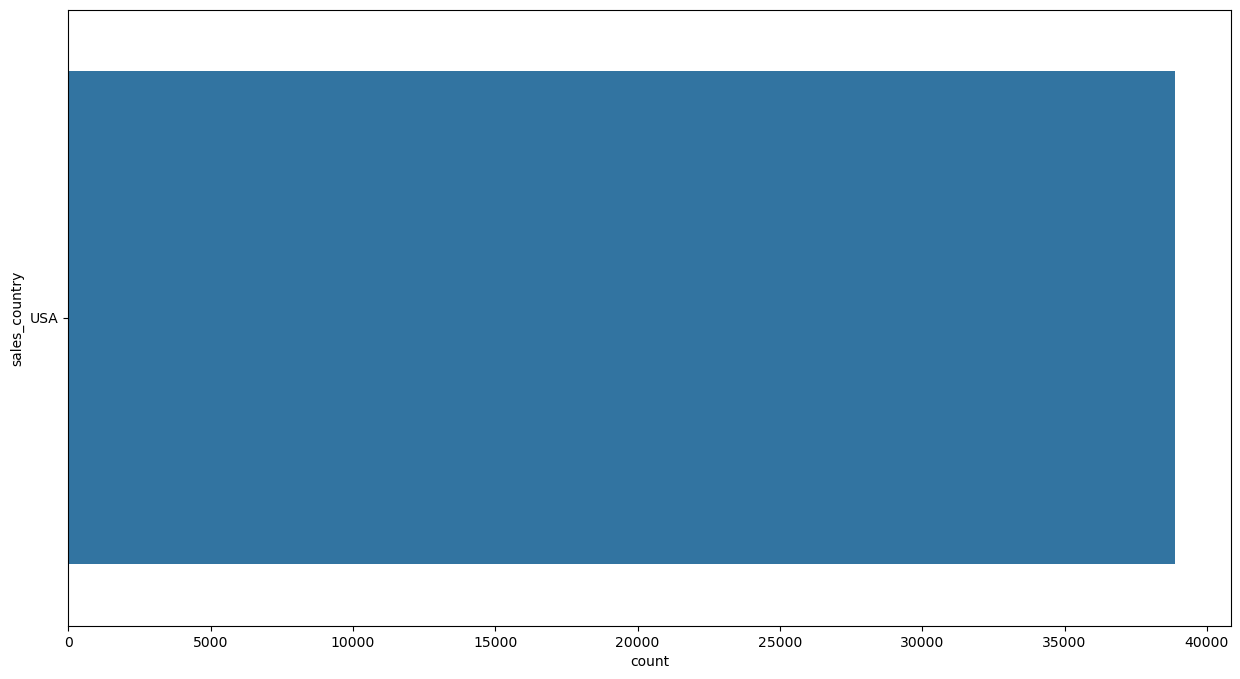

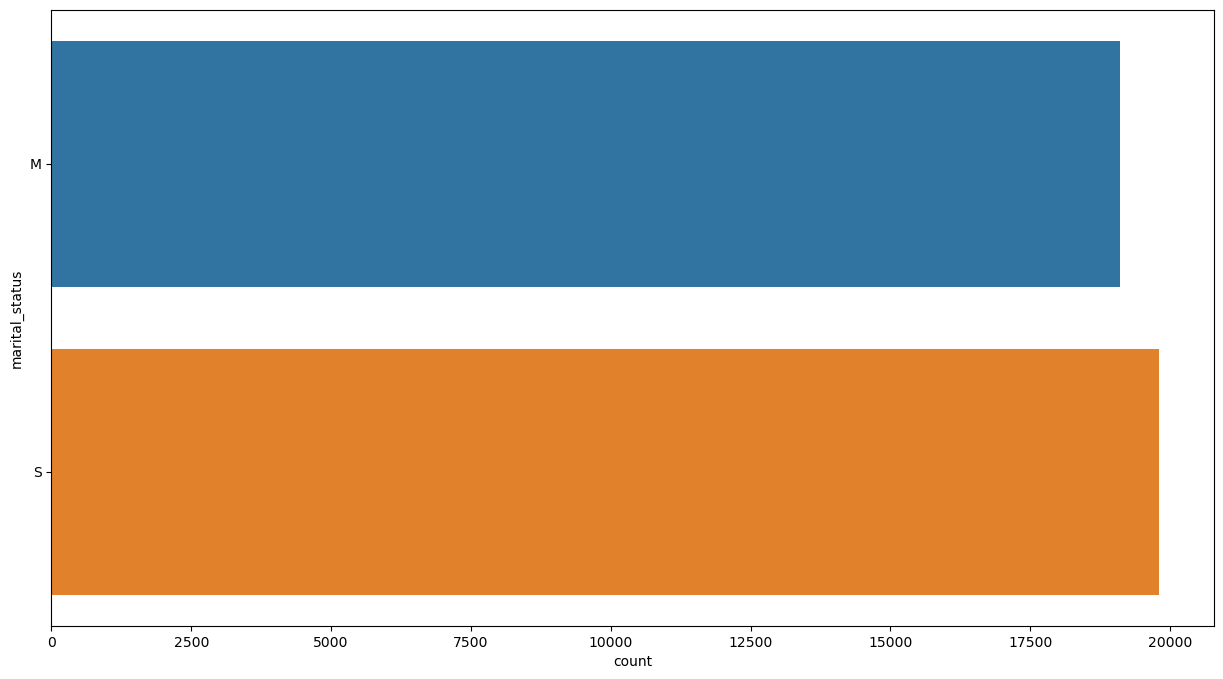

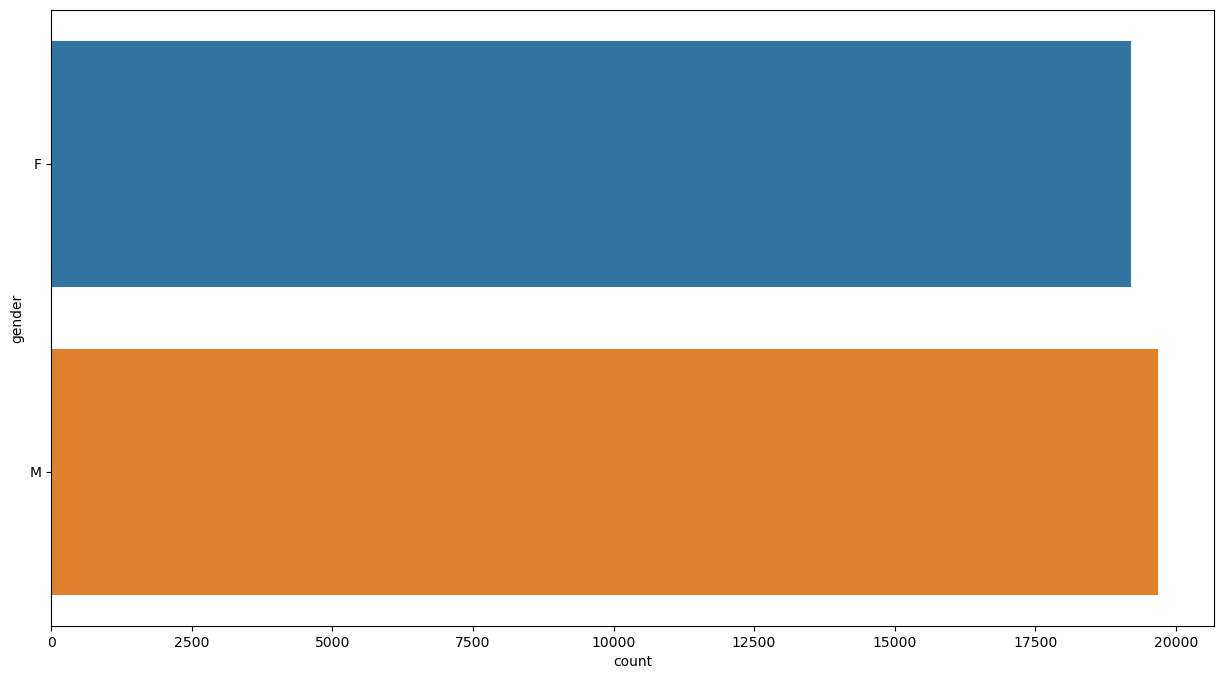

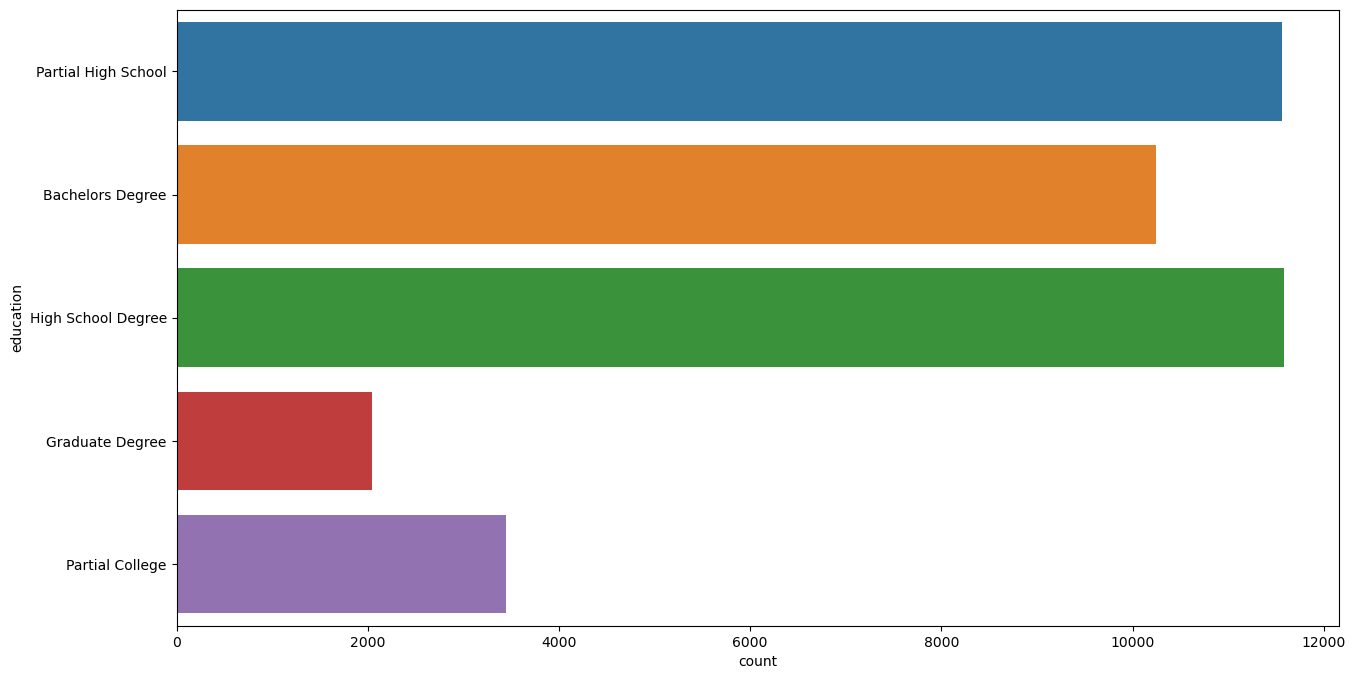

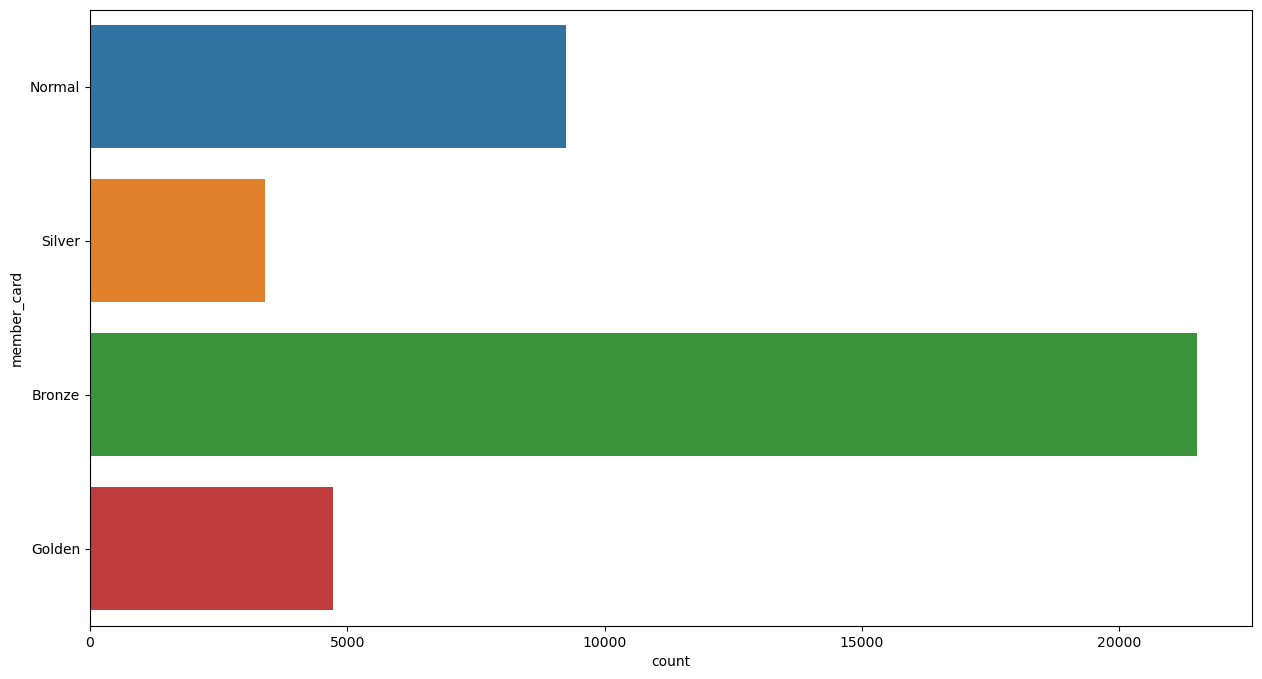

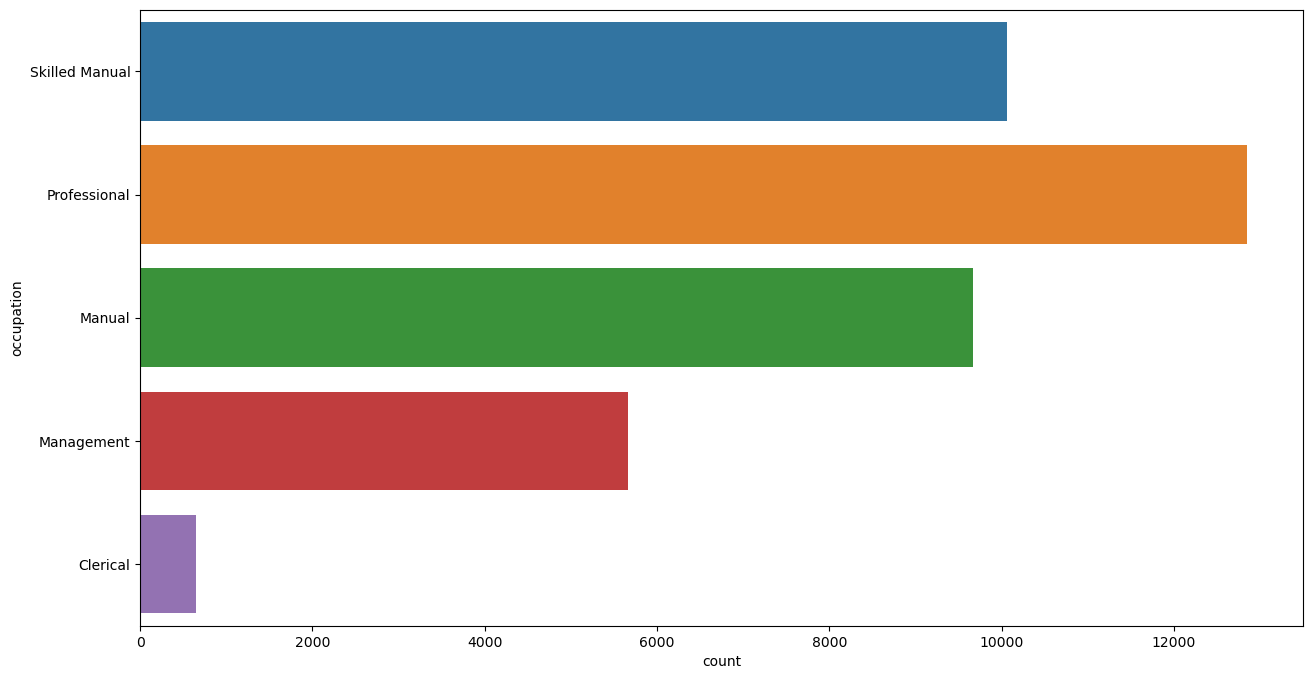

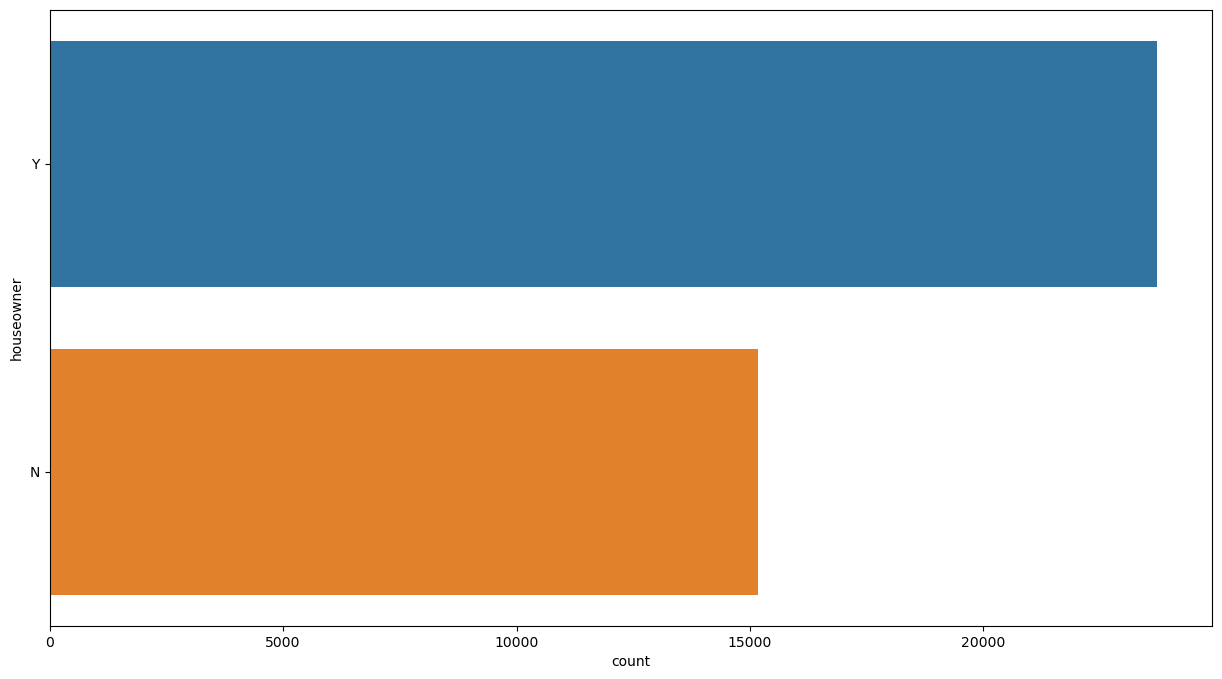

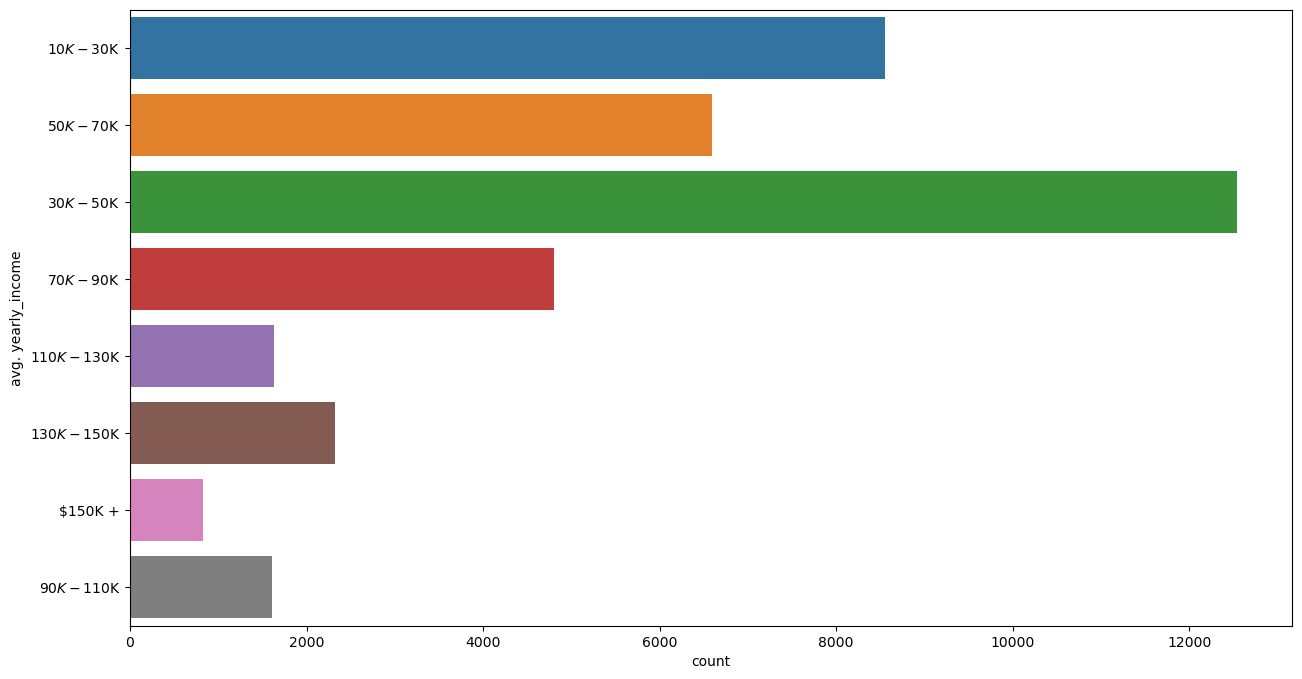

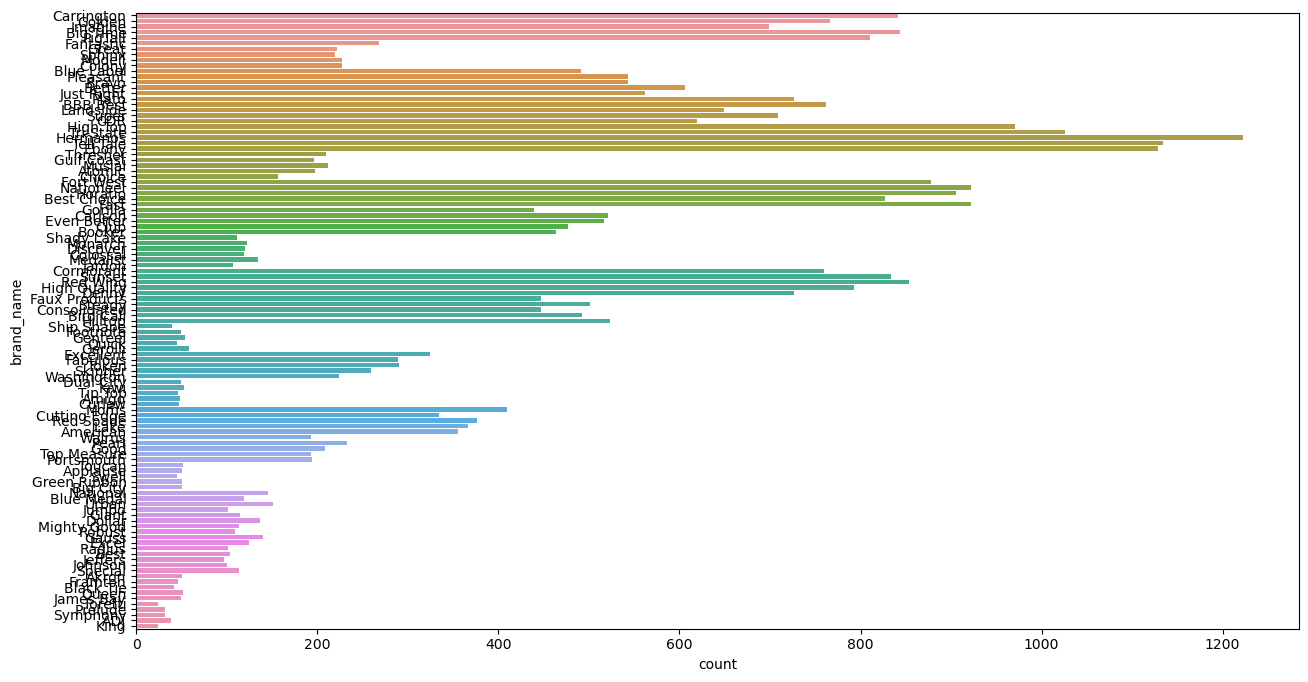

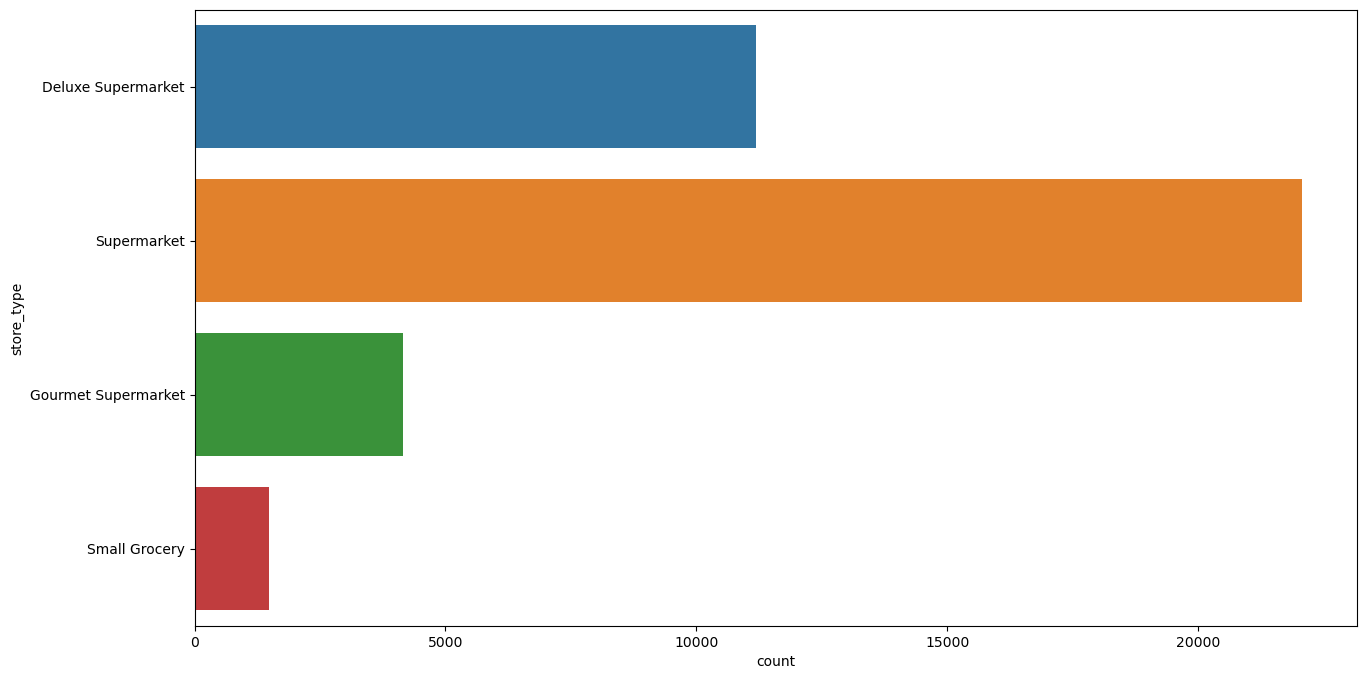

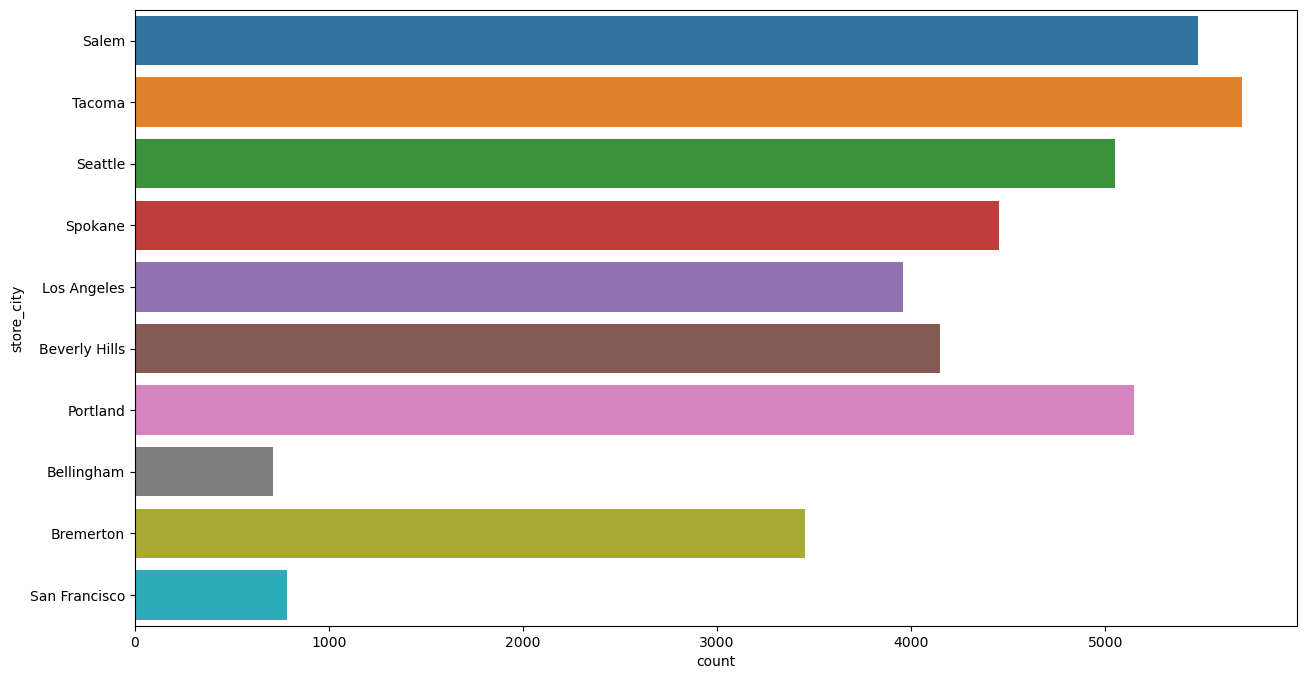

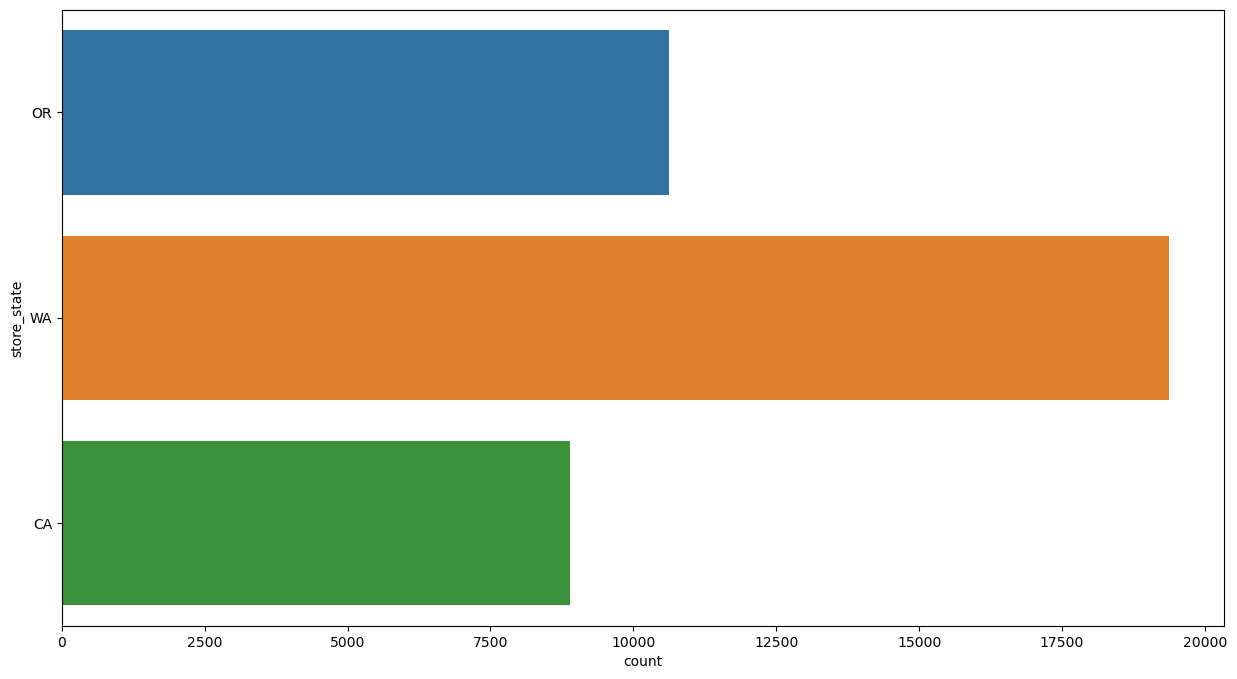

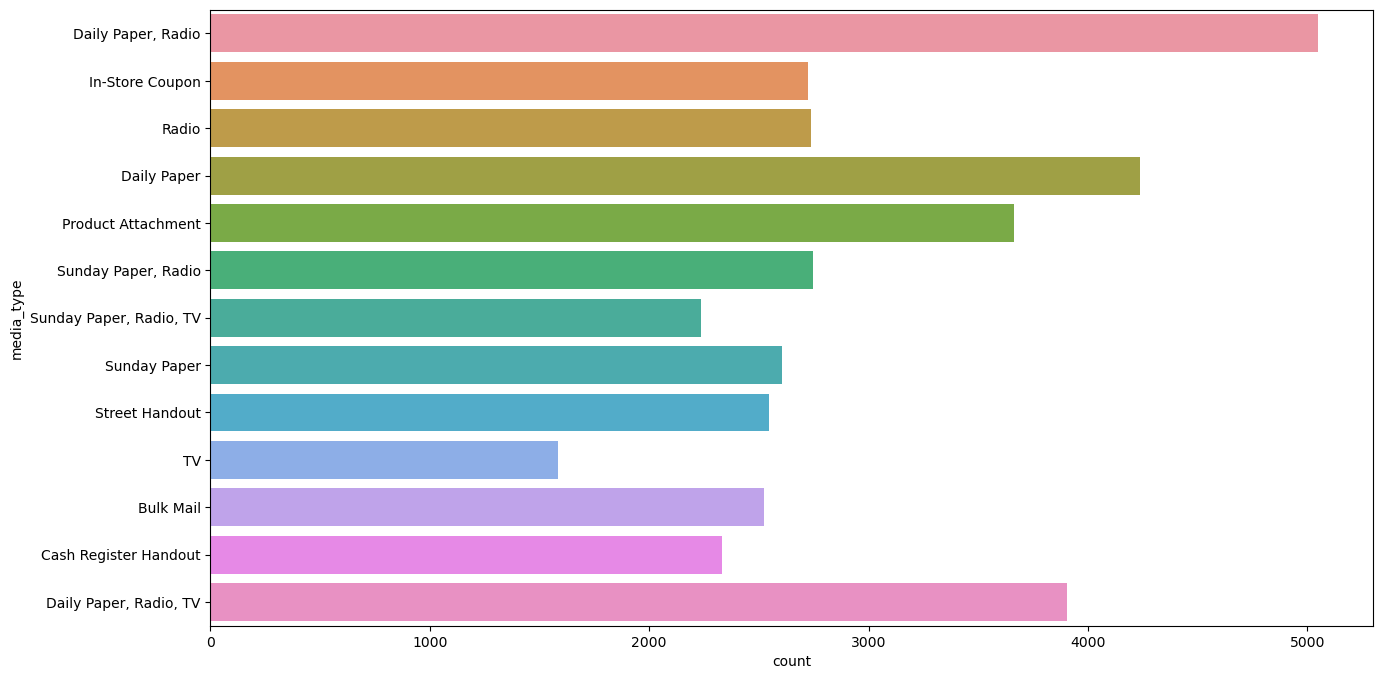

In [14]:
for i in cat_cols:
    sns.countplot(y=usdata[i])
    plt.show()

In [15]:
q1 = usdata.quantile(0.25)
q3 = usdata.quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [16]:
df_outlier = usdata[~((usdata>ul)|(usdata<ll)).any(axis=1)]

In [17]:
df_outlier.shape

(11976, 40)

In [18]:
usdata = df_outlier

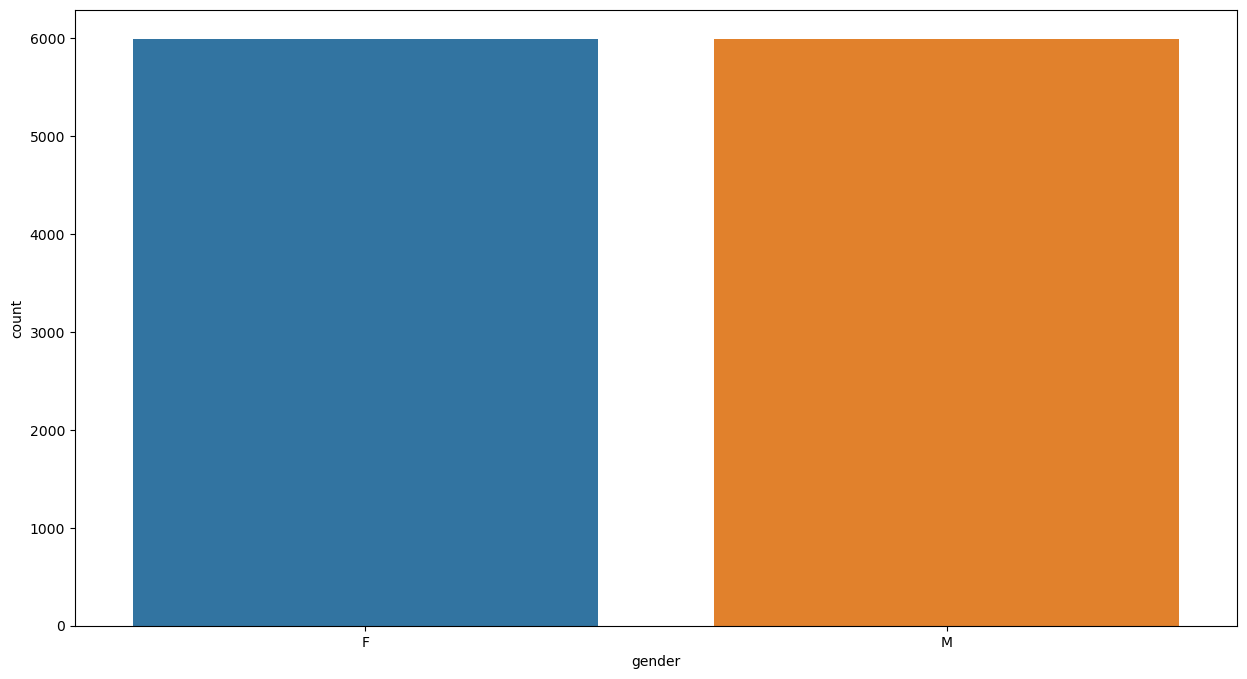

In [19]:
#data['gender'].value_counts().plot(kind='bar')
sns.countplot(data=usdata,x=usdata['gender'])
plt.show()

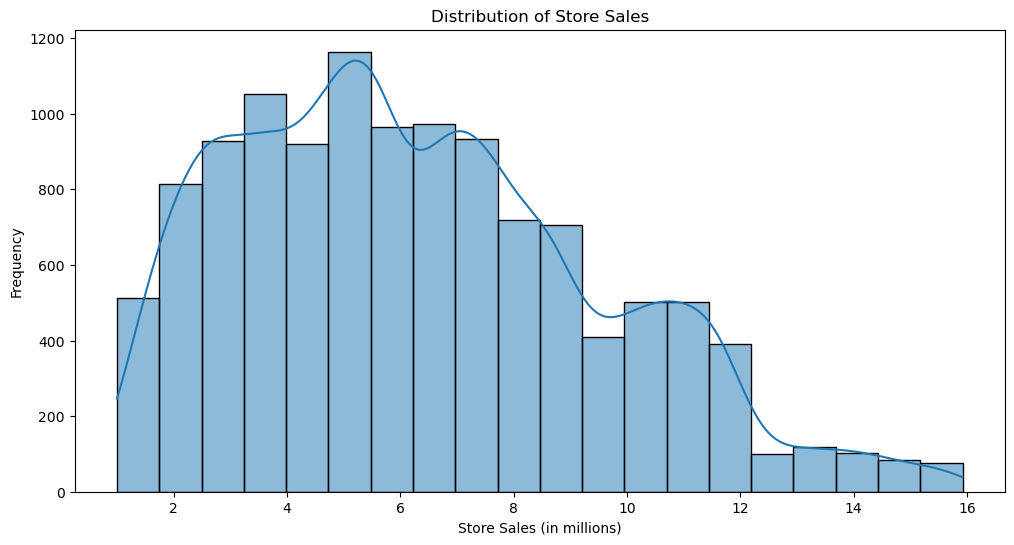

In [20]:
# Plot the distribution of store sales
plt.figure(figsize=(12, 6))
sns.histplot(data=usdata, x='store_sales(in millions)', bins=20, kde=True)
plt.title('Distribution of Store Sales')
plt.xlabel('Store Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

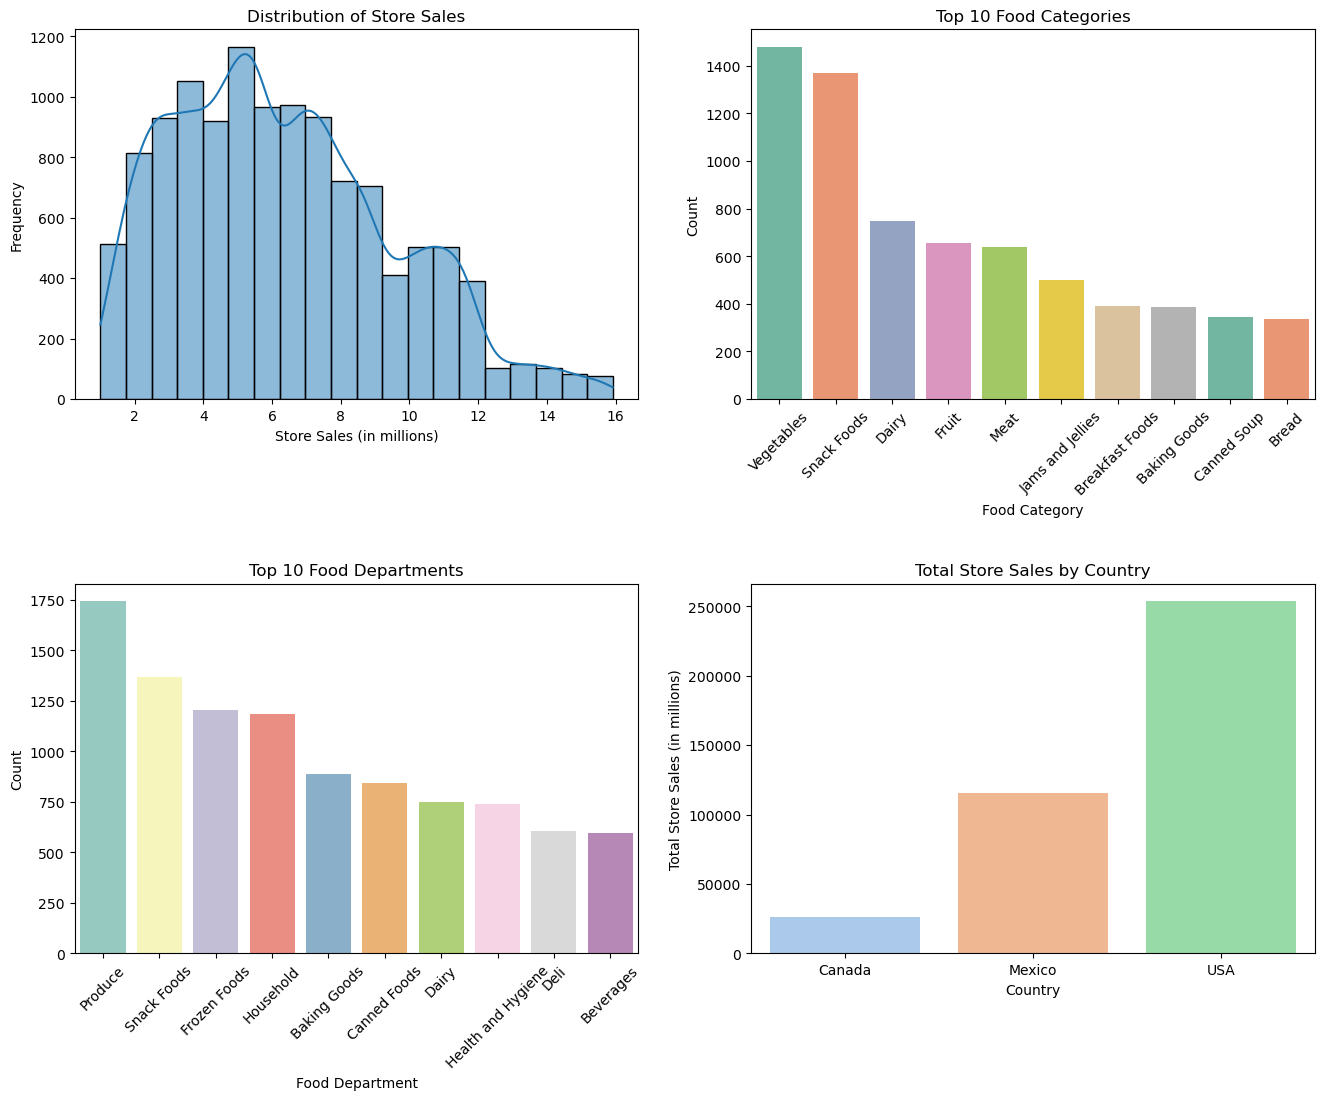

In [21]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)

# Plot the distribution of store sales
sns.histplot(data=usdata, x='store_sales(in millions)', bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Store Sales')
axes[0, 0].set_xlabel('Store Sales (in millions)')
axes[0, 0].set_ylabel('Frequency')

# Create a bar plot for food categories
food_category_counts = usdata['food_category'].value_counts()[:10]
sns.barplot(x=food_category_counts.index, y=food_category_counts.values, palette='Set2', ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Food Categories')
axes[0, 1].set_xlabel('Food Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# Create a bar plot for food departments
food_department_counts = usdata['food_department'].value_counts()[:10]
sns.barplot(x=food_department_counts.index, y=food_department_counts.values, palette='Set3', ax=axes[1, 0])
axes[1, 0].set_title('Top 10 Food Departments')
axes[1, 0].set_xlabel('Food Department')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

# Create a bar plot for sales by country
sales_by_country = data.groupby('sales_country')['store_sales(in millions)'].sum().reset_index()
sns.barplot(data=sales_by_country, x='sales_country', y='store_sales(in millions)', palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Total Store Sales by Country')
axes[1, 1].set_xlabel('Country')
axes[1, 1].set_ylabel('Total Store Sales (in millions)')

plt.show()


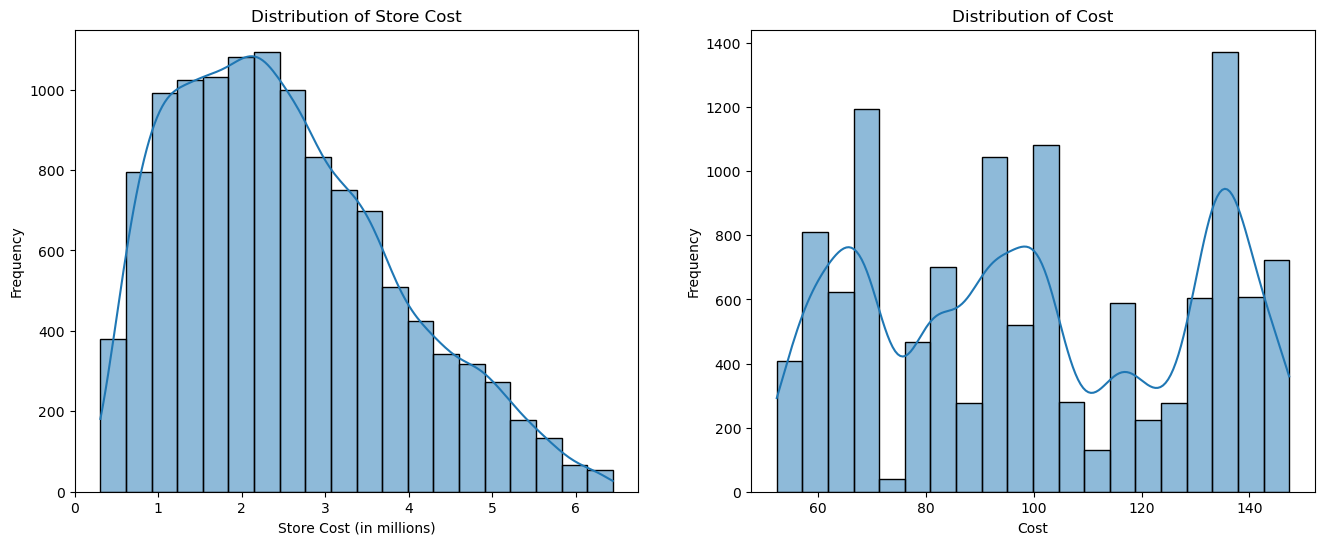

In [22]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of Store Cost
sns.histplot(data=usdata, x='store_cost(in millions)', bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Store Cost')
axes[0].set_xlabel('Store Cost (in millions)')
axes[0].set_ylabel('Frequency')

# Plot the distribution of Cost
sns.histplot(data=usdata, x='cost', bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Cost')
axes[1].set_xlabel('Cost')
axes[1].set_ylabel('Frequency')

plt.show()

In [23]:
data['store_cost(in millions)'].skew()

0.8329204965976573

In [24]:
store_features = [
    "store_type",
    "store_city",
    "store_state",
    "store_sqft",
    "grocery_sqft",
    "frozen_sqft",
    "meat_sqft",
    "coffee_bar",
    "video_store",
    "salad_bar",
    "prepared_food",
    "florist",
]

product_features = [
    "food_category",
    "food_department",
    "food_family",
    "brand_name",
    "SRP",
    "gross_weight",
    "net_weight",
    "recyclable_package",
    "low_fat",
    "units_per_case",
]

customer_features = [
    "marital_status",
    "gender",
    "total_children",
    "education",
    "member_card",
    "occupation",
    "houseowner",
    "avg_cars_at home(approx)",
    "avg. yearly_income",
    "num_children_at_home",
    # Note: duplcicate row, delete
    # "avg_cars_at home(approx).1",
]

promotion_features = ["promotion_name", "media_type"]

store_and_product_features = [
    "store_sales(in millions)",
    "store_cost(in millions)",
    "unit_sales(in millions)",
]

In [25]:
raw_data = (data.query("sales_country == 'USA'").drop(columns="sales_country"))


store_data = raw_data.loc[:, store_features].drop_duplicates().reset_index(drop=True)
promotion_data = raw_data.loc[:, promotion_features].drop_duplicates().reset_index(drop=True)
product_data = raw_data.loc[:, product_features].drop_duplicates().reset_index(drop=True)
customer_data = raw_data.loc[:, customer_features].drop_duplicates().reset_index(drop=True)

# replace feature groups with a single ID
intermedite_data = (
    raw_data
    # duplicate column in dataset
    .drop(columns=["avg_cars_at home(approx).1"])

    # pull out category specifc data and replace it with an ID
    .merge(
        (
            store_data.assign(store_id=lambda df: np.arange(len(df))).set_index(
                store_features
            )
        ),
        on=store_features,
    )
    .drop(columns=store_features)
    .merge(
        (
            customer_data.assign(customer_id=lambda df: np.arange(len(df))).set_index(
                customer_features
            )
        ),
        on=customer_features,
    )
    .drop(columns=customer_features)
    .merge(
        (
            product_data.assign(product_id=lambda df: np.arange(len(df))).set_index(
                product_features
            )
        ),
        on=product_features,
    )
    .drop(columns=product_features)
    .merge(
        (
            promotion_data.assign(promotion_id=lambda df: np.arange(len(df))).set_index(
                promotion_features
            )
        ),
        on=promotion_features,
    )
    .drop(columns=promotion_features)
)

sales_data = intermedite_data.drop(columns=["cost", "customer_id"]).drop_duplicates()

cost_data = intermedite_data.drop(
    columns=[
        "store_sales(in millions)",
        "store_cost(in millions)",
        "unit_sales(in millions)",
    ]
)

In [26]:
def drop_col_level(df, level=0):
    df.columns = df.columns.droplevel(level=level)

    return df

In [27]:
(
    cost_data
    .merge(promotion_data, left_on="promotion_id", right_index=True)
    .groupby(["store_id","promotion_name",])
    .agg(
        {
            "cost": [
                ("clc", "sum"),
                ("n_transactions", "count"),
                ("cost_per_customer", "median"),
                ("spread", lambda x: x.max() - x.min()),
                ("levels", "nunique"),
                ],
        }
    )
    .sort_index()
    .transform(drop_col_level)
    .reset_index()
)

,store_id,promotion_name,clc,n_transactions,cost_per_customer,spread,levels
0,0,Bag Stuffers,91196.56,788,126.62,44.00,2
1,0,Big Time Discounts,21855.96,196,111.51,0.00,1
2,0,Big Time Savings,9888.25,185,53.45,0.00,1
3,0,Cash Register Lottery,116211.57,1555,59.86,68.02,4
4,0,Double Down Sale,11783.28,232,50.79,0.00,1
...,...,...,...,...,...,...,...
181,9,Three for One,3956.47,29,136.43,0.00,1
182,9,Tip Top Savings,2167.36,16,135.46,0.00,1
183,9,Unbeatable Price Savers,1804.35,23,78.45,0.00,1
184,9,Weekend Markdown,3398.89,55,67.51,14.28,2


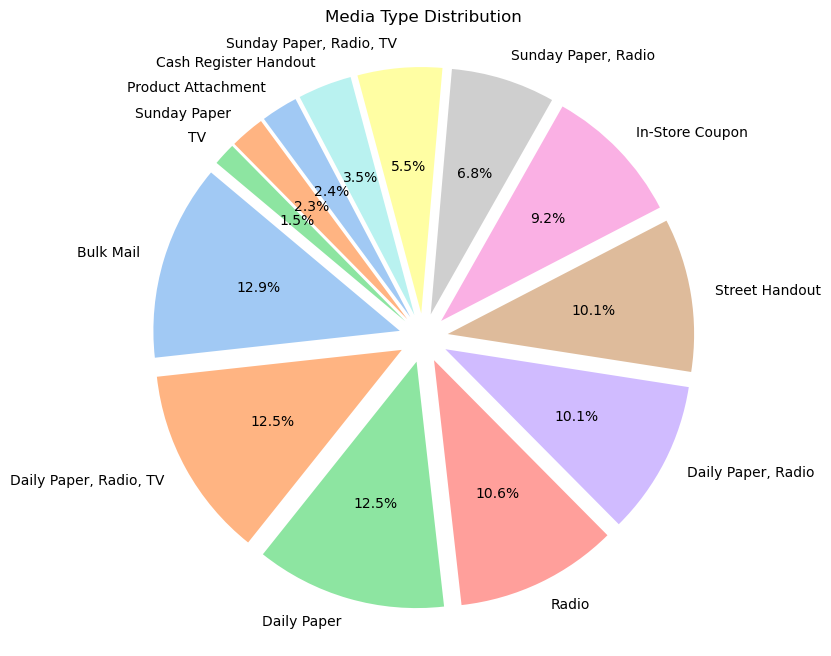

In [28]:
# Count the occurrences of each media type
media_type_counts = usdata['media_type'].value_counts()

# Calculate the number of slices
num_slices = len(media_type_counts)

# Create an equal explode list for all slices
explode = [0.1] * num_slices  # Adjust the explosion factor (0.1) as needed

# Create a pie chart with percentages and explode evenly
plt.figure(figsize=(8, 8))
plt.pie(media_type_counts, labels=media_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), explode=explode)
plt.title('Media Type Distribution')
plt.show()



Promotions are done in all types of channels almost equally

In [29]:
target_data_with_cost_and_product = (
    cost_data
    .merge(product_data, left_on="product_id", right_index=True)
    .groupby(["promotion_id", "store_id", "cost"])
    .agg({
        "cost": [("no_of_transactions", "count")],
        "product_id": [("n_products", "nunique")],
        "brand_name": [("n_brands", "nunique")],
        "food_category": [("food_category", "nunique")],
        "food_department": [("food_department", "nunique")],
        "SRP": [("retail_price", "mean")],
        "gross_weight": [("gross_weight", "mean")],
        "net_weight": [("net_weight", "mean")],
        "units_per_case": [("units_per_case", "mean")],
    })
    .transform(drop_col_level)
    .reset_index()
)

In [30]:
target_data_with_cost_and_product

,promotion_id,store_id,cost,no_of_transactions,n_products,n_brands,food_category,food_department,retail_price,gross_weight,net_weight,units_per_case
0,0,0,126.62,593,514,92,42,22,2.110725,14.078803,12.074907,18.483980
1,0,7,117.93,22,22,18,14,12,2.085455,13.534091,11.615000,19.863636
2,1,0,59.86,726,583,96,45,22,2.038609,13.739807,11.733320,19.064738
3,2,0,84.16,228,213,76,41,21,2.157719,13.926974,11.959298,19.513158
4,3,0,95.78,254,238,73,40,20,2.107126,14.060945,12.027126,19.980315
...,...,...,...,...,...,...,...,...,...,...,...,...
220,187,9,136.43,29,28,23,14,12,2.106897,12.765862,10.684483,17.586207
221,188,9,95.65,22,22,22,14,11,2.036818,13.423636,11.467273,20.500000
222,189,9,57.51,16,16,15,13,9,1.702500,13.430000,11.652500,20.812500
223,190,7,129.64,21,21,17,17,11,2.231429,13.624762,11.456190,18.428571


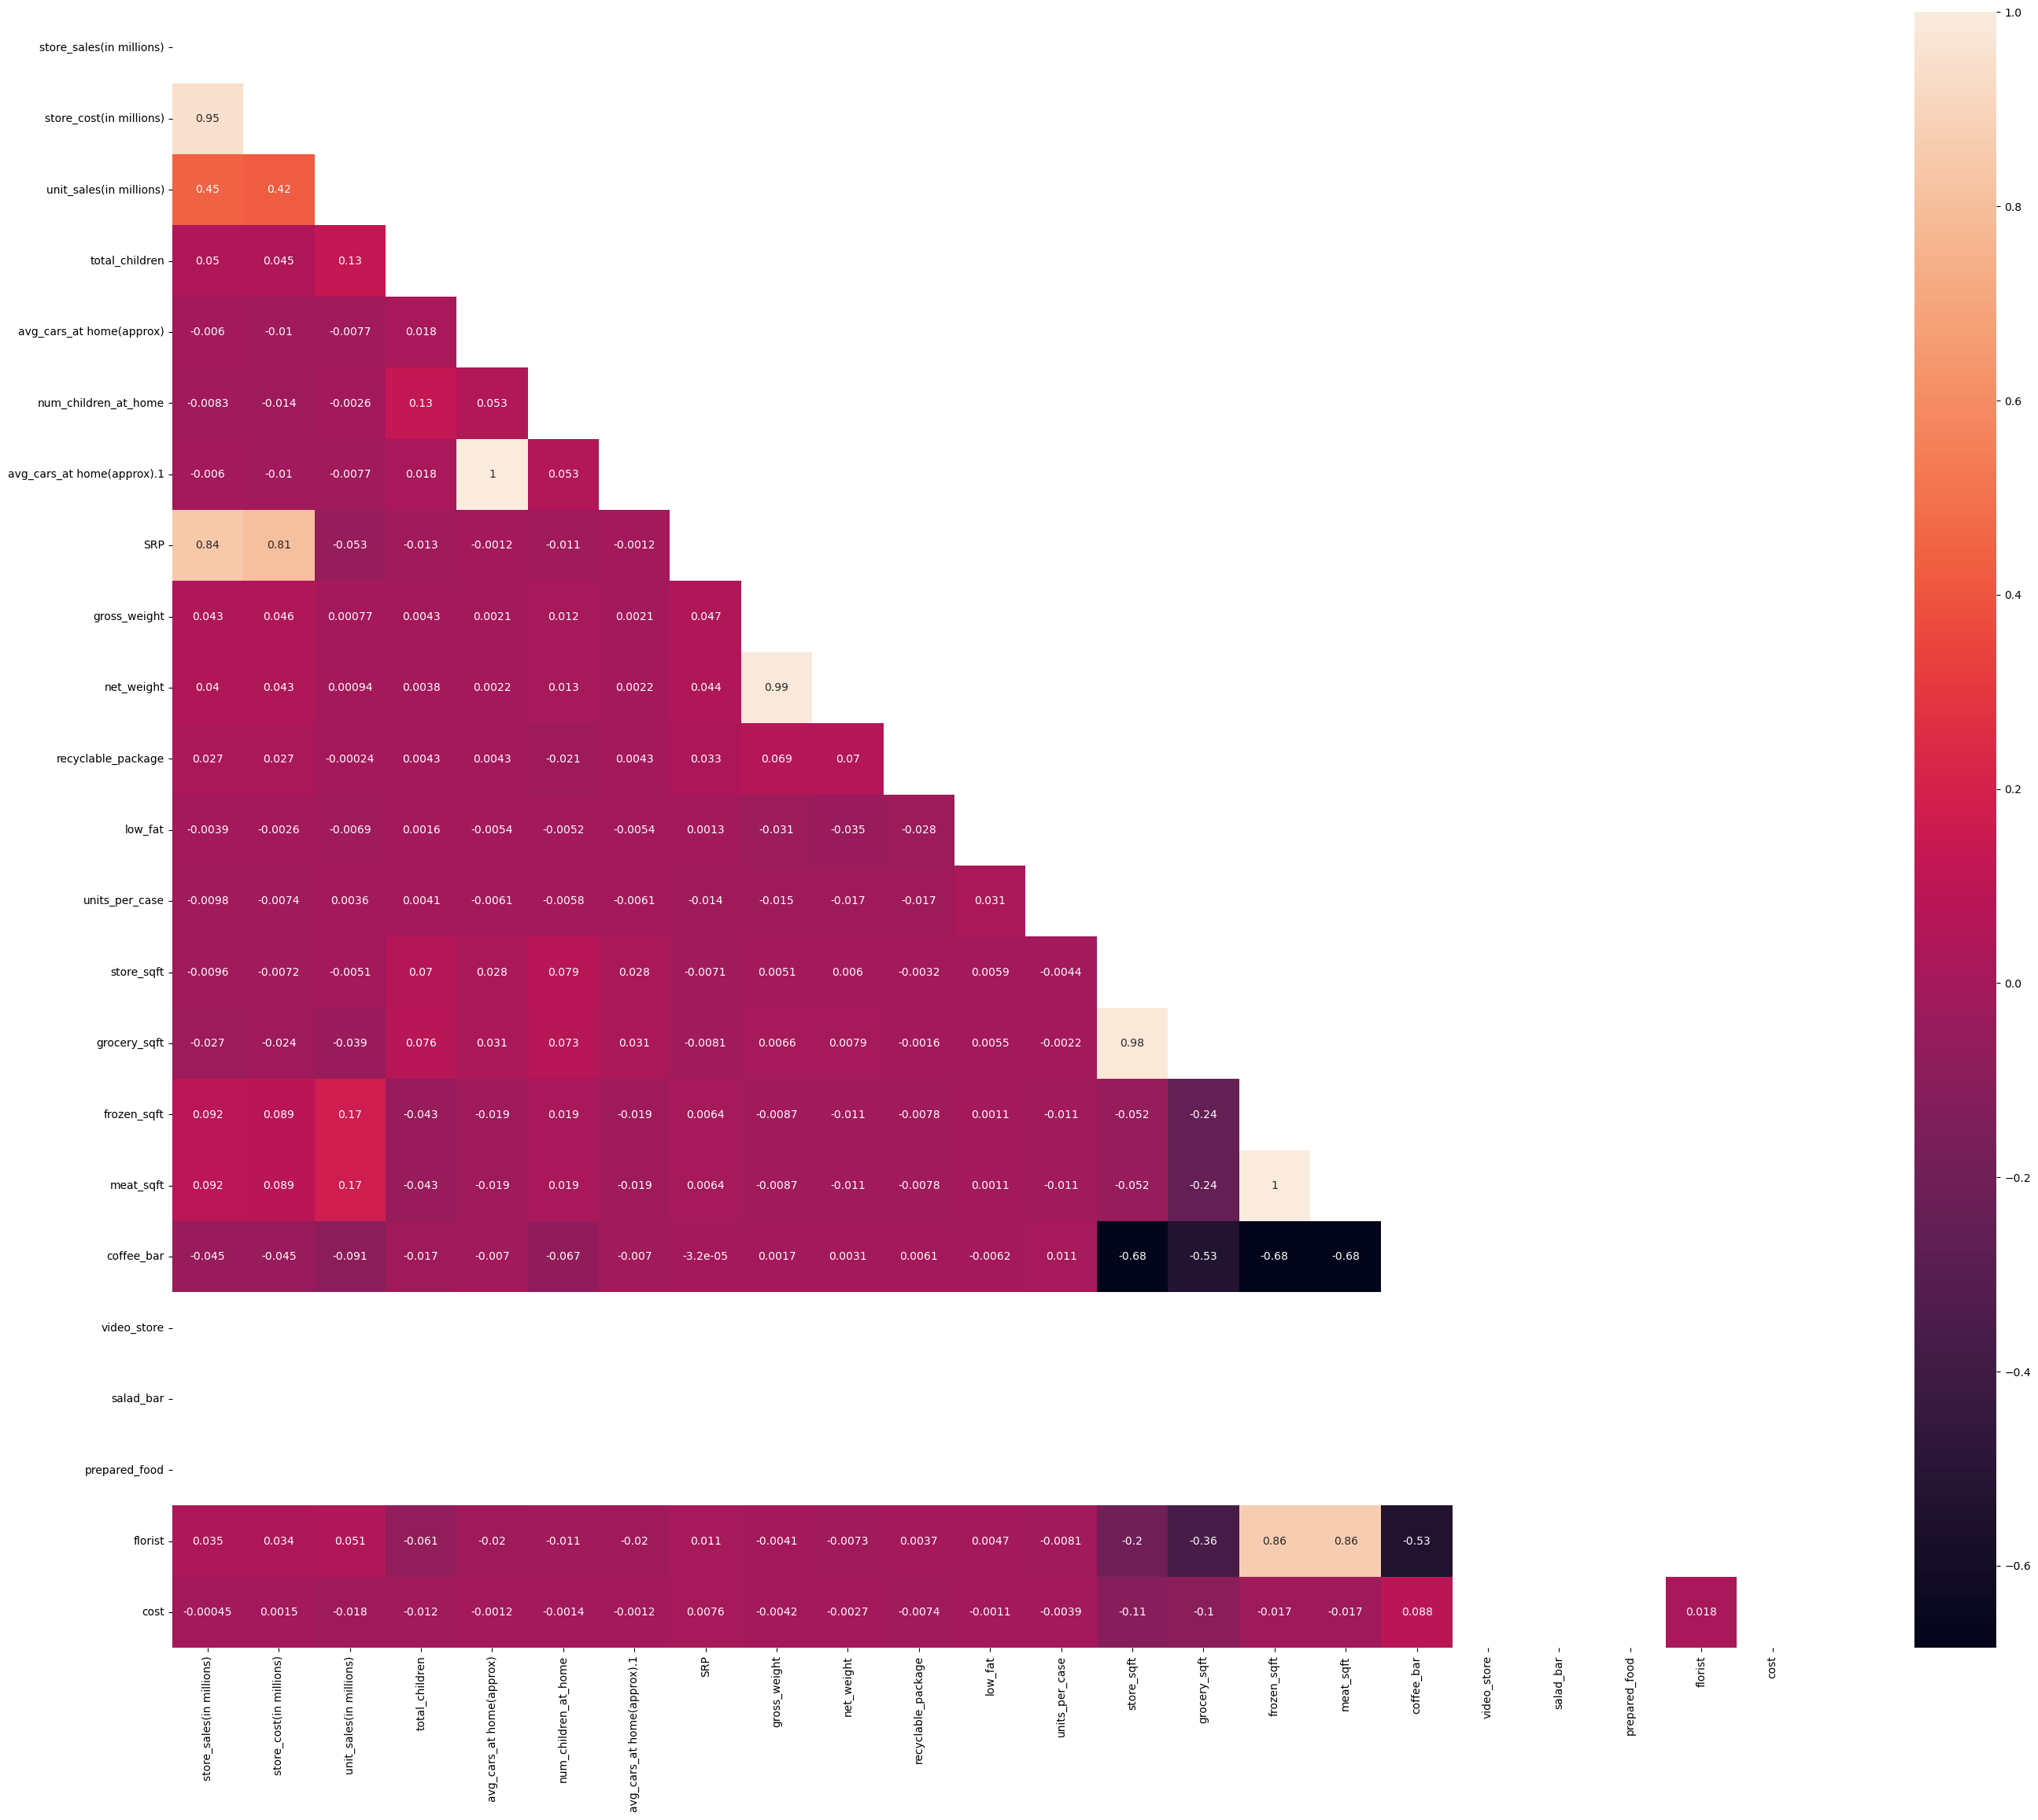

In [31]:
fig, ax = plt.subplots(figsize=(35, 27))
mask = np.triu(np.ones_like(usdata.corr(), dtype=bool))
heatmap = sns.heatmap(usdata.corr(),
                      mask = mask,annot=True,annot_kws = {"size": 10},square = True,
                      )
plt.show()

In [32]:
data_cat = usdata.select_dtypes(exclude=np.number)

In [33]:
data_num = usdata.select_dtypes(include=np.number)

In [34]:
encoded_cat = pd.get_dummies(data_cat,drop_first=True)

In [35]:
final_df = pd.concat([encoded_cat,data_num],axis=1)

In [36]:
final_df.isnull().sum().sum()

0

In [37]:
final_df

,food_category_Bathroom Products,food_category_Beer and Wine,food_category_Bread,food_category_Breakfast Foods,food_category_Candles,food_category_Candy,food_category_Canned Anchovies,food_category_Canned Clams,food_category_Canned Oysters,food_category_Canned Sardines,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
40,0,0,0,1,0,0,0,0,0,0,...,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,138.53
41,0,0,0,1,0,0,0,0,0,0,...,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,66.78
42,0,0,0,1,0,0,0,0,0,0,...,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,69.63
43,0,0,0,1,0,0,0,0,0,0,...,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,69.63
44,0,0,0,1,0,0,0,0,0,0,...,21215.0,13305.0,4746.0,3164.0,1.0,0.0,0.0,0.0,0.0,123.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60329,0,0,0,0,0,0,0,0,0,0,...,28206.0,22271.0,3561.0,2374.0,1.0,0.0,0.0,0.0,0.0,90.58
60330,0,0,0,0,0,0,0,0,0,0,...,28206.0,22271.0,3561.0,2374.0,1.0,0.0,0.0,0.0,0.0,122.16
60331,0,0,0,0,0,0,0,0,0,0,...,28206.0,22271.0,3561.0,2374.0,1.0,0.0,0.0,0.0,0.0,120.09
60332,0,0,0,0,0,0,0,0,0,0,...,28206.0,22271.0,3561.0,2374.0,1.0,0.0,0.0,0.0,0.0,117.93


In [38]:
#Libraries to Import:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


plt.rcParams['figure.figsize'] = [15, 6]

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
import statsmodels.stats.api as ssa
import statsmodels.api as sma
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler



from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


from mlxtend.feature_selection import SequentialFeatureSelector


import statsmodels.api as sma

#pd.options.display.max_rows = None

pd.options.display.max_columns = None

pd.options.display.float_format = '{:0.6f}'.format

In [39]:
X = final_df.drop('cost',axis=1)

y = final_df['cost']

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7,random_state = 100)

In [40]:
mm=MinMaxScaler()
X_trainm=mm.fit_transform(X_train)
X_testm=mm.transform(X_test)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8383, 283)
(3593, 283)
(8383,)
(3593,)


In [42]:
print(X_trainm.shape)
print(X_testm.shape)
print(y_train.shape)
print(y_test.shape)

(8383, 283)
(3593, 283)
(8383,)
(3593,)


In [43]:
def get_train_rmse(model):
    
    train_pred = model.predict(X_trainm)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)
    
    return(rmse_train)

In [44]:
def get_test_rmse(model):

    
    test_pred = model.predict(X_testm)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return(rmse_test)

In [46]:
def mape(actual, predicted):
    
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    test_pred = model.predict(X_testm)
    
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [47]:
def get_score(model):
    
    r_sq = model.score(X_trainm, y_train)
     
    n = X_trainm.shape[0]
    
    k = X_trainm.shape[1]
    
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    return ([r_sq, r_sq_adj])

In [48]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

In [49]:
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    global score_card

    global X_trainm
    global X_testm
    global y_train
    global y_test
    
    
  

    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model),
                        'Train_RMSE':get_train_rmse(model),
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [50]:
linreg = LinearRegression()

MLR_model = linreg.fit(X_trainm, y_train)

MLR_model.score(X_trainm, y_train)

0.7416103526292469

In [60]:
print('RMSE on train set: ', get_train_rmse(MLR_model))

print('RMSE on test set: ', get_test_rmse(MLR_model))

difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  14.6893
RMSE on test set:  15.3747
Difference between RMSE on train and test set:  0.6854000000000013


In [51]:
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.741610,0.732582,15.374700,11.208988,14.689300


In [52]:
ridge = Ridge(alpha = 1, max_iter = 500)

ridge.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 15.373


In [53]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.741610,0.732582,15.374700,11.208988,14.689300
1,Ridge Regression (with alpha = 1),1,-,0.740852,0.731797,15.373000,11.300145,14.710900


In [54]:
ridge = Ridge(alpha = 5, max_iter = 500)

ridge.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 15.4335


In [55]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

enet.fit(X_trainm, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 24.1906


In [56]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE,Train_RMSE
0,Linear Regression,-,-,0.741610,0.732582,15.374700,11.208988,14.689300
1,Ridge Regression (with alpha = 1),1,-,0.740852,0.731797,15.373000,11.300145,14.710900
2,Elastic Net Regression,0.1,0.01,0.313728,0.289748,24.190600,23.411530,23.939300


In [57]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]

ridge = Ridge()

ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_trainm, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.001} 

RMSE on test set: 15.3697


In [58]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_list = []
for i in range(X.shape[1]):
    vif_list.append(variance_inflation_factor(X.values,i))
pd.DataFrame({'Features':X.columns,'VIF':vif_list}).sort_values(by='VIF',ascending=False)

,Features,VIF
0,food_category_Bathroom Products,inf
133,brand_name_Akron,inf
165,brand_name_Ebony,inf
166,brand_name_Even Better,inf
167,brand_name_Excel,inf
...,...,...
273,units_per_case,1.120926
113,gender_M,1.086766
279,video_store,NaN
280,salad_bar,NaN


In [61]:
lr = LinearRegression()

sfs_backward= SequentialFeatureSelector(estimator = lr,
                                           k_features=5,
                                           forward = False,
                                           verbose=2,
                                           scoring = "neg_root_mean_squared_error")

In [ ]:
sfs_backward.fit(X_trainm, y_train)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.1min

[2023-09-18 11:11:47] Features: 282/5 -- score: -15.24176176912791[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.1min

[2023-09-18 11:13:48] Features: 281/5 -- score: -15.22991337600609[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   17.2s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.2min

[2023-09-18 11:15:49] Features: 280/5 -- score: -15.229925430481245[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   20.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.3min

[2023-09-18 11:17:57] Features: 279/5 -- score: -15.227359056705286

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
lr = LinearRegression()
rfe = RFE(estimator = lr,n_features_to_select = 5)

In [ ]:
rfe.fit(X_trainm,ytrain)

In [ ]:
pd.DataFrame(rfe.ranking_,index=X_trainm.columns)

In [ ]:
feature_index = pd.Series(rfe.ranking_,index=X_trainm.columns).sort_values(ascending=False)

In [ ]:
impfeature_rfe = feature_index[feature_index==1].index

In [ ]:
impfeature_rfe

In [ ]:
rfe_train = X_trainm.loc[:,impfeature_rfe]
rfe_test = X_testm.loc[:,impfeature_rfe]

In [ ]:
lr = LinearRegression()
lr.fit(rfe_train, ytrain)
pred = lr.predict(rfe_test)
rfe_rmse = np.sqrt(mean_squared_error(ytest,pred))
rfe_rmse

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
kf = KFold(n_splits=5,shuffle=True,random_state=1)

In [ ]:
lr = LinearRegression()
predictions_ml = []
rmse_kf = []
for train_index, test_index in kf.split(xtrain):
    kf_xtrain = xtrain.iloc[train_index] #xtrain
    kf_xtest = xtrain.iloc[test_index] #xtest
    kf_ytrain = ytrain.iloc[train_index]#ytrain
    kf_ytest = ytrain.iloc[test_index]#ytest
    predictions_ml.append(lr.fit(kf_xtrain,kf_ytrain).predict(kf_xtest)) #test is the original test data
    kfold=lr.fit(kf_xtrain,kf_ytrain)
    pred = kfold.predict(kf_xtest)
    rmse_kf.append(np.sqrt(mean_squared_error(kf_ytest,pred)))

In [ ]:
from sklearn.model_selection import LeaveOneOut
lr = LinearRegression()

loocv = LeaveOneOut()

loocv_rmse = []
loocv_score = []
for train_index, test_index in loocv.split(xtrain):

  lcv_xtrain = xtrain.iloc[train_index]  #xtrain
  lcv_xtest = xtrain.iloc[test_index] # xtest
  lcv_ytrain = ytrain.iloc[train_index] # ytrain. This has the dependent variable Appliances of train data of y
  lcv_ytest = ytrain.iloc[test_index] # ytest  This has the dependent variable Appliances of train data of y


  #pred=lr.fit(pd.DataFrame(lcv_xtrain),pd.DataFrame(lcv_ytrain)).predict(pd.DataFrame(lcv_xtest))

  pred=lr.fit(lcv_xtrain,lcv_ytrain).predict(lcv_xtest)

  loocv_rmse.append(np.sqrt(mean_squared_error(lcv_ytest,pred)))

  loocv_score.append(lr.fit(lcv_xtrain,lcv_ytrain).score(lcv_xtest,lcv_ytest))



print(np.mean(loocv_rmse))